<a href="https://colab.research.google.com/github/jon-chun/sentimentarcs/blob/main/sentimentarcs_part7_join_norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SentimentArcs Part 7: Join Norm**

Jon Chun
15 Sep 2021

* https://colab.research.google.com/github/chengjun/mybook/blob/main/11-4-sentiment-classifier.ipynb#scrollTo=c749tKCSZpbw

# **Sandbox Testing**

In [ ]:
!pip install alpha_vantage

In [ ]:
# https://algotrading101.com/learn/python-correlation-guide/

import pandas as pd
from alpha_vantage.timeseries import TimeSeries

In [ ]:
#grab tickers from csv file

# watchlist_df = pd.read_csv('watchlist.csv', header=None)
# watchlist = watchlist_df.iloc[0].tolist()

watchlist = ['AAPL', 'MSFT', 'GLD', 'XOM', 'NFLX']

In [ ]:
%env ALPHAVANTAGE_API_KEY='8BK5HZ2RTSMFHG9U'

In [ ]:
#instantiate TimeSeries class from alpha_vantage library
app = TimeSeries(output_format='pandas')

In [ ]:
#itter through watchlist and retrieve daily price data
stocks_df = pd.DataFrame()
for ticker in watchlist:
    alphav_df = app.get_daily_adjusted(ticker)
    # print(f'alphav header:\n    {type(alphav_df)}')
    alphav_df = alphav_df[0]
    alphav_df.columns = [i.split(' ')[1] for i in alphav_df.columns]

    stocks_df[ticker] = alphav_df['adjusted'].pct_change()

In [ ]:
stocks_df.shape

In [ ]:
stocks_df.iloc[0]['AAPL'] # .isna().all()

In [ ]:
stocks_df[stocks_df.isna().any(axis=1)]

In [ ]:
stocks_df.head()

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.MSFT))

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.NFLX))

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.NFLX, method='spearman'))

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.NFLX, method='kendall'))

In [ ]:
stocks_df.corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(stocks_df.corr())
plt.show()

In [ ]:
ax = sns.heatmap(stocks_df.corr(), cmap='RdYlGn', linewidths=.1)
plt.show()

In [ ]:
nflx_corr_df = stocks_df.corr().NFLX
print(nflx_corr_df.idxmax())

In [ ]:
nflx_corr_df[ nflx_corr_df < 1 ]

In [ ]:
  print(nflx_corr_df[ nflx_corr_df < 1 ].idxmax())

In [ ]:
print(nflx_corr_df.idxmin())

In [ ]:
stocks_df.cov()

In [ ]:
import numpy as np

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.NFLX, method='spearman'))

In [ ]:
print(np.square(stocks_df.AAPL.corr(stocks_df.NFLX, method='spearman')))

# **Install and Load Libraries**

In [ ]:
!pip install texthero

In [ ]:
import texthero as hero
from texthero import preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import os
import sys
import io
import glob
import pickle

import re
import string

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer, HashingVectorizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.preprocessing import MinMaxScaler   # To normalize time series
from sklearn.preprocessing import StandardScaler # To Standardize time series: center(sub mean) and rescale within 1 SD (only for well-behaved guassian distributions)
from sklearn.preprocessing import RobustScaler   # To Standardize time series: center(sub median) and rescale within 25%-75% (1st-3rd) IQR (better for noisy, outliers distributions)

minmax_scaler = MinMaxScaler()
mean_std_scaler = StandardScaler()
median_iqr_scaler = RobustScaler()

In [ ]:
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()

# **Configure Jupyter**

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Configure Jupyter

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from ipywidgets import widgets, interactive

# Configure Google Colab

# %load_ext google.colab.data_table

In [5]:
# Text wrap

from IPython.display import HTML

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)


In [6]:
# Enlarge matplotlib plot size

plt.rcParams["figure.figsize"] = (20, 40)

# temporarily
# from matplotlib.pyplot import figure
# figure(figsize=(8, 6), dpi=80)

# **Connect to gDrive**

In [7]:
# Connect to Google gDrive

# Flag to indicate first run through code 
flag_first_run = True

from google.colab import drive, files
drive.mount('/gdrive')
%cd /gdrive/MyDrive/

Mounted at /gdrive
/gdrive/MyDrive


In [8]:
%cd ./research/2021/sa_book_code/books_sa/

/gdrive/MyDrive/research/2021/sa_book_code/books_sa


# **Globals**

In [9]:
# List of Corpora

corpora_ls = ['cdickens_achristmascarol',
              'cdickens_greatexpectations',
              'ddefoe_robinsoncrusoe',
              'emforster_howardsend',
              'fbaum_thewonderfulwizardofoz',
              'fdouglass_narrativelifeofaslave',
              'fscottfitzgerald_thegreatgatsby',
              'geliot_middlemarch',
              'hjames_portraitofalady',
              'homer-ewilson_odyssey',
              'imcewan_machineslikeme',
              'jausten_prideandprejudice', # missing RoBERTaXML8lang
              'jconrad_heartofdarkness',
              'jjoyce_portraitoftheartist',
              'jkrowling_1sorcerersstone',  
              'mproust-mtreharne_3guermantesway', # missing all Transformers
              'mshelley_frankenstein',
              'mtwain_huckleberryfinn',
              'staugustine_confessions9end',
              'tmorrison_beloved',
              'vnabokov_palefire',
              'vwoolf_mrsdalloway',
              'vwoolf_orlando',
              'vwoolf_thewaves',
              'vwoolf_tothelighthouse']

In [10]:
# Taxonomy of Models 

groups_ls = ['models_baseline_ls',
                'models_sentimentr_ls',
                'models_syuzhetr_ls',
                'models_transformer_ls']

# Could add suffix '_sst2' if classifiers trained on SST2 (currently requires 30m on Colab Pro/GPU+RAM)
models_supervised_ls = ['linreg_imdb50k',
                   'svc_imdb50k',
                   'logreg_imdb50k',
                   'dforest_imdb50k',
                   'multinb_imdb50k']

models_baseline_ls = ['sentimentr',
                      'syuzhet',
                      'bing',
                      'sentiword',
                      'senticnet',
                      'nrc',
                      'afinn',
                      'vader',
                      'textblob',
                      'flair',
                      'pattern',
                      'stanza']

models_sentimentr_ls = ['jockers_rinker',
                        'jockers',
                        'huliu',
                        'senticnet',
                        'sentiword',
                        'nrc',
                        'lmcd']

models_syuzhetr_ls = ['syuzhet',
                      'bing',
                      'afinn',
                      'nrc']

models_transformer_ls = ['roberta15lg', 
                         'nlptown', 
                         'yelp', 
                         'hinglish',
                         'imdb2way', 
                         'huggingface', 
                         't5imdb50k', 
                         'robertaxml8lang']

models_ml_ls = ['multinb',
             'logreg',
             'logreg_cv',
             'rf',
             'xgb',
             'flaml',
             'autogluon']
             
models_dnn_ls = ['fcn',
              'lstm',
              'cnn']

# Temporarily redefine from English to French Transformer Models
# models_transformer_ls = ['flaubert', 'nlptown', 'robertaxml8lang']

In [11]:
corpora_full_dt = {
    'cdickens_achristmascarol':'A Christmas Carol by Charles Dickens',
    'cdickens_greatexpectations':'Great Expectations by Charles Dickens',
    'ddefoe_robinsoncrusoe':'Robinson Crusoe by Daniel Defoe',
    'emforster_howardsend':'Howards End by E.M.Forster',
    'fbaum_thewonderfulwizardofoz':'The Wonderful Wizard of Oz by Frank Baum',
    'fdouglass_narrativelifeofaslave':'Narrative of the Life of Frederick Douglass, An American Slave',
    'fscottfitzgerald_thegreatgatsby':'The Great Gatsby by F.Scott Fitzgerald',
    'geliot_middlemarch':'Middlemarch by George Eliot',
    'hjames_portraitofalady':'Portrait of a Lady by Henry James',
    'homer-ewilson_odyssey':'The Odyssey by Homer (trans. Emily Wilson)',
    'imcewan_machineslikeme':'Machines Like Me by Ian McEwan',
    'jausten_prideandprejudice':'Pride and Prejudice by Jane Austen',
    'jconrad_heartofdarkness':'Heart of Darkness by Joseph Conrad',
    'jjoyce_portraitoftheartist':'A Portrait of the Artist as a Young Man by James Joyce',
    'jkrowling_1sorcerersstone':'Harry Potter and the Sorcerers Stone by J.K.Rowling',
    'mproust-mtreharne_3guermantesway':'The Guermantes Way by Marcel Proust',
    'mshelley_frankenstein':'Frankenstein by Mary Shelley',
    'mtwain_huckleberryfinn':'Huckleberry Finn by Mark Twain',
    'staugustine_confessions9end':'Confessions (thru Book 9) by St. Augustine',
    'tmorrison_beloved':'Beloved by Toni Morrison',
    'vnabokov_palefire':'Palefire by Vladimir Nabokov',
    'vwoolf_mrsdalloway':'Mrs. Dalloway by Virginia Woolf',
    'vwoolf_orlando':'Orlando by Virginia Woolf',
    'vwoolf_thewaves':'The Waves by Virginia Woolf',
    'vwoolf_tothelighthouse':'To The Lighthouse by Virginia Woolf'}

In [12]:
# Master Dictionary of DataFrames (one per Corpus), each column with raw sentiment polarities from a given model 
#   declare early to minimize accidental clobbering/deletion

corpora_all_dt = {}

# **Custom Functions**

In [ ]:
# https://www.kaggle.com/aditya6040/7-models-on-imdb-dataset-best-score-88-2/notebook

def get_metrics(model,x,y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y,y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

# **Read Every Model Sentiment Data**

* https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

In [ ]:
# Get list of files in data subdir

data_dir = './data_corpora_sa'

filenames_ls = os.listdir(data_dir)
filenames_ls


## **Read Individual Models [corpora_sa_df]**

In [ ]:
%%time

# NOTE: 1m10s

# Read in all models sentiment values in *.csv files located in data_dir
#   into Global Dict (corpora_sa_dt) 
#   with keys=corpora and values=models sentiment values

corpora_sa_dt = {}
model_group_set = set()

def read_csvfiles(folder_path):

  for i,afile in enumerate(filenames_ls):
    print(f'Reading in afile #{i}: {afile}')
    full_path = f'{folder_path}/{afile}'
    print(f'  full_path: {full_path}')
    model_name = '_'.join(afile.split('_')[1:])
    model_name = model_name.split('.')[0]
    print(f'  model_name: {model_name}')
    corpora_sa_dt[model_name] = pd.read_csv(full_path) # .to_dict()
    model_group = model_name.split('_')[0]
    print(f'  model_group: {model_group}')
    model_group_set.add(model_group)

read_csvfiles(data_dir)

In [ ]:
# Show model groups based upon datafile prefix (e.g. 'baseline_' or 'dnn_')

print(f'model_group_set:\n  {model_group_set}')

In [ ]:
# Verify the number and names of Corpora read

[i for i in corpora_sa_dt.keys()]

print(f'\n\n    Read {len(corpora_sa_dt.keys())} Corpora')

In [ ]:
corpora_sa_dt['ml_vwoolf_thewaves'].columns

In [ ]:
corpora_sa_dt['baseline_cdickens_achristmascarol'].head(1)
corpora_sa_dt['baseline_cdickens_achristmascarol'].info()

## **Merge all Models together for each Corpus [corpora_all_df]**

In [ ]:
# Get common corpus roots 

corpus_root_set = set()

# print(f'\nStarting with {len(filenames_ls)} total corpus x model combinations\n')
for acorpus_model in filenames_ls:
  corpus_model_root = '_'.join(acorpus_model.split('_')[2:])
  corpus_model_root = corpus_model_root.split('.')[0]
  print(f'corpus_model_root: {corpus_model_root}')
  corpus_root_set.add(corpus_model_root)

corpus_root_ls = list(corpus_root_set)
print(f'\nThese {len(filenames_ls)} original (corpus)x(model) combination files\n  were reduced to {len(corpus_root_ls)} unique corpus roots')

In [ ]:
corpora_sa_dt.keys()

In [ ]:
# Verify sample Model features

corpora_sa_dt['ml_fdouglass_narrativelifeofaslave'].info()

In [ ]:
corpora_all_dt = {}

models_dnn_ls

In [ ]:
# Create corpus_all_df that merges all Models for a given Corpus

model_dfs_ls = []

for i,acorpus in enumerate(corpus_root_ls):
  model_dfs_ls = []

  # Get all the 'corpus_model' keys for each 'corpus'
  for j, agroup in enumerate(model_group_set):
    corpus_model = f'{agroup}_{acorpus}'
    print(f'\n\n{agroup.upper()} Models #{i*len(model_group_set) + j}: {corpus_model}.csv')
    model_cols_ls = corpora_sa_dt[corpus_model].columns
    print(f'  Cols: {model_cols_ls}')
    corpus_model_path = f'{data_dir}/models_{corpus_model}.csv'
    # adf = pd.DataFrame()
    adf = pd.read_csv(corpus_model_path, index_col=None)
    model_dfs_ls.append(adf)
  
  # Merge the 3 DataFrames (baseline_, ml_, dnn_)
  corpus_all_df = model_dfs_ls[0].merge(model_dfs_ls[1], on='sent_no').merge(model_dfs_ls[2], on='sent_no') # pd.concat(model_dfs_ls, axis=0, ignore_index=True)
  corpus_all_df = corpus_all_df.loc[:, ~corpus_all_df.columns.str.contains('Unnamed')]
  corpus_all_df = corpus_all_df.loc[:, ~corpus_all_df.columns.str.contains('stdscaler')]
  corpus_all_df = corpus_all_df.loc[:, ~corpus_all_df.columns.str.contains('scores')]
  corpus_all_df = corpus_all_df.loc[:, ~corpus_all_df.columns.str.contains('_len')]
  corpus_all_df = corpus_all_df.loc[:, ~corpus_all_df.columns.str.contains('_x')]
  corpus_all_df = corpus_all_df.loc[:, ~corpus_all_df.columns.str.contains('_y')]
  print('\n')
  corpora_all_dt[acorpus] = corpus_all_df

In [ ]:
# Check copora and model counts

col_nonmodel_ct = 5 # non model columns (e.g. sent_no, parag_no, sect_no, sent_raw, sent_clean)

print('SUMMARY ----------')
print(f'{len(corpora_all_dt)} Corpora in dataset')
print(f"{len(corpora_all_dt['hjames_portraitofalady'].columns) - col_nonmodel_ct} Models for each Corpus")

In [ ]:
corpora_sa_dt['ml_hjames_portraitofalady'].head(1)

In [ ]:
corpora_all_dt['hjames_portraitofalady'].head(2)
# corpora_all_dt['hjames_portraitofalady'].info()

In [ ]:
corpora_all_dt['cdickens_achristmascarol'].info()

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern'].rolling(400, center=True).mean().plot()

In [ ]:
!pwd

In [ ]:
temp_df = pd.read_csv('./tmorrison_beloved/beloved_pattern.csv')

In [ ]:
temp_df['pattern'].value_counts()

# **Standardize and Smooth**

## **Option (a): Read in zScore/SMA 10% DataFrames**

In [13]:
# ERROR: must get median_z

# Read all models with orignal and zscore values

subdir_all = 'data_corpora_all'

corpora_all_dt = {}

for i, acorpus in enumerate(corpora_ls):

  filepath = f'./{subdir_all}/models_all_{acorpus}.csv'

  print(f'Reading {acorpus} from:\n    {filepath}\n')

  corpora_all_dt[acorpus] = pd.read_csv(filepath, index_col=[0])


Reading cdickens_achristmascarol from:
    ./data_corpora_all/models_all_cdickens_achristmascarol.csv

Reading cdickens_greatexpectations from:
    ./data_corpora_all/models_all_cdickens_greatexpectations.csv

Reading ddefoe_robinsoncrusoe from:
    ./data_corpora_all/models_all_ddefoe_robinsoncrusoe.csv

Reading emforster_howardsend from:
    ./data_corpora_all/models_all_emforster_howardsend.csv

Reading fbaum_thewonderfulwizardofoz from:
    ./data_corpora_all/models_all_fbaum_thewonderfulwizardofoz.csv

Reading fdouglass_narrativelifeofaslave from:
    ./data_corpora_all/models_all_fdouglass_narrativelifeofaslave.csv

Reading fscottfitzgerald_thegreatgatsby from:
    ./data_corpora_all/models_all_fscottfitzgerald_thegreatgatsby.csv

Reading geliot_middlemarch from:
    ./data_corpora_all/models_all_geliot_middlemarch.csv

Reading hjames_portraitofalady from:
    ./data_corpora_all/models_all_hjames_portraitofalady.csv

Reading homer-ewilson_odyssey from:
    ./data_corpora_all/mode

In [14]:
# Verify a Model columns for both regular and z-Score values

corpora_all_dt['cdickens_achristmascarol'].columns

Index(['sent_no', 'fcn', 'lstm', 'cnn', 'multinb', 'logreg', 'logreg_cv', 'rf',
       'xgb', 'flaml', 'autogluon', 'parag_no', 'sect_no', 'sent_raw',
       'sent_clean', 'sentimentr', 'syuzhet', 'bing', 'sentiword', 'senticnet',
       'nrc', 'afinn', 'vader', 'textblob', 'pattern', 'stanza', 'flair',
       'jockers_rinker', 'jockers', 'huliu', 'lmcd', 'roberta15lg', 'yelp',
       'nlptown', 'huggingface', 'hinglish', 'imdb2way', 't5imdb50k',
       'robertaxml8lang', 'flair_z', 'jockers_rinker_z', 'sentimentr_z',
       'nlptown_z', 'hinglish_z', 'multinb_z', 'pattern_z', 'autogluon_z',
       'yelp_z', 'huggingface_z', 'robertaxml8lang_z', 'rf_z', 'flaml_z',
       'fcn_z', 'cnn_z', 'huliu_z', 'vader_z', 'logreg_z', 'senticnet_z',
       'jockers_z', 'logreg_cv_z', 'nrc_z', 'lstm_z', 'syuzhet_z', 'xgb_z',
       'textblob_z', 'roberta15lg_z', 'sentiword_z', 'afinn_z', 't5imdb50k_z',
       'stanza_z', 'imdb2way_z', 'bing_z', 'lmcd_z', 'median_z'],
      dtype='object')

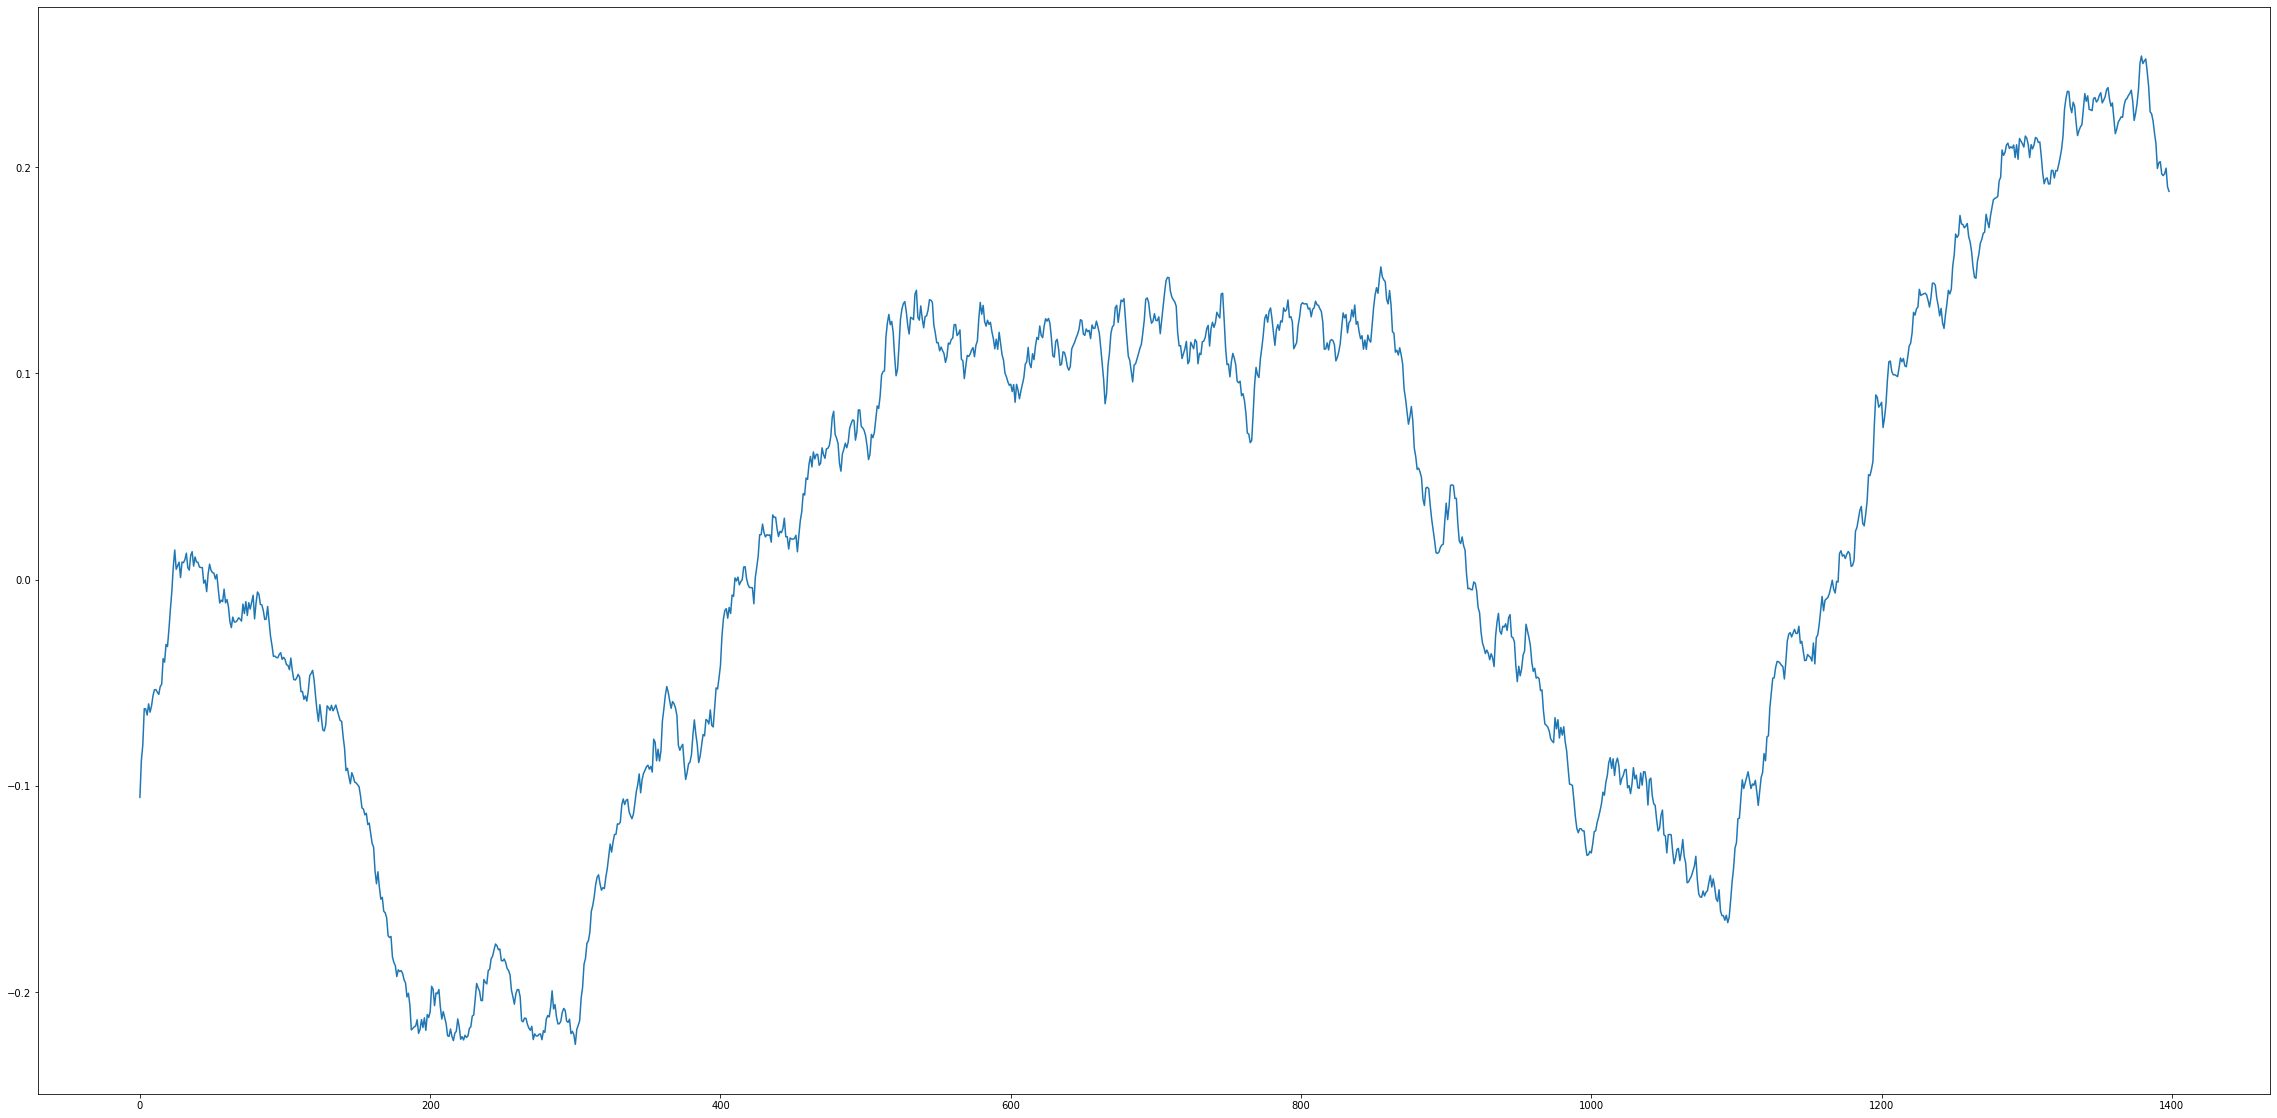

In [20]:
plt.rcParams["figure.figsize"] = (40,20)

win10per = int(0.1*corpora_all_dt['cdickens_achristmascarol'].shape[0])
               
corpora_all_dt['cdickens_achristmascarol']['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot()

## **Execute for both Option (a) and Option (b)**

In [21]:
models_ls = corpora_all_dt.keys()
print(models_ls)
print(f'\nThere are {len(models_ls)} Corpora')

dict_keys(['cdickens_achristmascarol', 'cdickens_greatexpectations', 'ddefoe_robinsoncrusoe', 'emforster_howardsend', 'fbaum_thewonderfulwizardofoz', 'fdouglass_narrativelifeofaslave', 'fscottfitzgerald_thegreatgatsby', 'geliot_middlemarch', 'hjames_portraitofalady', 'homer-ewilson_odyssey', 'imcewan_machineslikeme', 'jausten_prideandprejudice', 'jconrad_heartofdarkness', 'jjoyce_portraitoftheartist', 'jkrowling_1sorcerersstone', 'mproust-mtreharne_3guermantesway', 'mshelley_frankenstein', 'mtwain_huckleberryfinn', 'staugustine_confessions9end', 'tmorrison_beloved', 'vnabokov_palefire', 'vwoolf_mrsdalloway', 'vwoolf_orlando', 'vwoolf_thewaves', 'vwoolf_tothelighthouse'])

There are 25 Corpora


In [22]:
model_all_cols_ls = corpora_all_dt['cdickens_achristmascarol'].columns
print(model_all_cols_ls)

print(f'\nEach Corpus has {len(model_all_cols_ls)} Columns')

model_noncols_ls = ['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean']
print(f'\n  {len(model_noncols_ls)} Columns are meta-information (not Models)\n  {model_noncols_ls}')


model_cols_ls = list(set(model_all_cols_ls) - set(model_noncols_ls))
print(f'\n  {len(model_cols_ls)} Columns are these Models:\n  {[i for i in model_cols_ls]}')

# Get list of zScore Model Columns in Corpus DataFrame
model_z_cols_ls = [i for i in model_cols_ls if i.endswith('_z')]
print(f'\n  {len(model_z_cols_ls)} zScore Columns are these Models:\n  {[i for i in model_z_cols_ls]}')


Index(['sent_no', 'fcn', 'lstm', 'cnn', 'multinb', 'logreg', 'logreg_cv', 'rf',
       'xgb', 'flaml', 'autogluon', 'parag_no', 'sect_no', 'sent_raw',
       'sent_clean', 'sentimentr', 'syuzhet', 'bing', 'sentiword', 'senticnet',
       'nrc', 'afinn', 'vader', 'textblob', 'pattern', 'stanza', 'flair',
       'jockers_rinker', 'jockers', 'huliu', 'lmcd', 'roberta15lg', 'yelp',
       'nlptown', 'huggingface', 'hinglish', 'imdb2way', 't5imdb50k',
       'robertaxml8lang', 'flair_z', 'jockers_rinker_z', 'sentimentr_z',
       'nlptown_z', 'hinglish_z', 'multinb_z', 'pattern_z', 'autogluon_z',
       'yelp_z', 'huggingface_z', 'robertaxml8lang_z', 'rf_z', 'flaml_z',
       'fcn_z', 'cnn_z', 'huliu_z', 'vader_z', 'logreg_z', 'senticnet_z',
       'jockers_z', 'logreg_cv_z', 'nrc_z', 'lstm_z', 'syuzhet_z', 'xgb_z',
       'textblob_z', 'roberta15lg_z', 'sentiword_z', 'afinn_z', 't5imdb50k_z',
       'stanza_z', 'imdb2way_z', 'bing_z', 'lmcd_z', 'median_z'],
      dtype='object')

Each Corp

## **Option (b): Generate zScore/SMA 10% DataFrames**

In [ ]:
# Specific types for Corpus columns

print('Before specifying Corpus column types:')
corpora_all_dt['cdickens_achristmascarol'].info()

for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus: {acorpus}')
  for j, amodel in enumerate(model_cols_ls):
    corpora_all_dt[acorpus][amodel] = corpora_all_dt[acorpus][amodel].astype('float')
  corpora_all_dt[acorpus]['sent_raw'] = corpora_all_dt[acorpus]['sent_raw'].astype('string')
  corpora_all_dt[acorpus]['sent_clean'] = corpora_all_dt[acorpus]['sent_clean'].astype('string')


print('After specifying Corpus column types:')
corpora_all_dt['cdickens_achristmascarol'].info()
# corpora_all_dt[acorpus][amodel].astype(np.float64)

In [ ]:
# Setup

from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()

# fit and transform the data
# scaled_data = scaler.fit_transform(X)

In [ ]:
type(stdscaler.fit_transform(np.asarray(corpora_all_dt['cdickens_achristmascarol']['xgb']).reshape(1,-1)))

In [ ]:
# corpora_all_dt['cdickens_achristmascarol']['xgb_stdscaler'] = stdscaler.fit_transform(np.asarray(corpora_all_dt['cdickens_achristmascarol']['xgb']))

In [ ]:
# Setup

from scipy.stats import zscore

In [ ]:
# Test scipy zscore with plot

plt.rcParams["figure.figsize"] = (40,20)

temp_df = pd.DataFrame()

# stats.zscore(a)
temp_np = np.asarray(corpora_all_dt['cdickens_achristmascarol']['vader'])
temp_z_np = zscore(temp_np)

# temp_std_ser = stdscaler.fit_transform(np.asarray(temp_ser).reshape(1,-1)).ravel()
# pd.Series(temp_std_ser)
temp_df['test'] = pd.Series(temp_z_np)
win10per = int(0.1*temp_df.shape[0])
temp_df['test'].rolling(win10per, center=True, min_periods=1).mean().plot()

In [ ]:
# Compute z-scores for all Model Time Series and add to corpora_all_dt[acorpus] DataFrame

# corpora_allz_dt = {}
temp_df = pd.DataFrame()

pattern_z = re.compile(r'_z$')

for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus: {acorpus}')
  for j, amodel in enumerate(model_cols_ls):
    # print(f'Corpus #{i} {acorpus} with Model #{j} {amodel}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    # Skip existing z-Scores
    if not pattern_z.search(amodel): 
      print(f'  processing model: {amodel}')
      temp_np = np.asarray(corpora_all_dt[acorpus][amodel])
      temp_z_np = zscore(temp_np)

      amodel_z = f'{amodel}_z'
      corpora_all_dt[acorpus][amodel_z] = pd.Series(temp_z_np)

In [ ]:
# Verify zScores for all Models are computed

corpora_all_dt[acorpus].loc[:, corpora_all_dt[acorpus].columns.str.contains('_z')].columns

In [ ]:
# Compute the median_z for all individual zScore Models in each Corpus

for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus: {acorpus}')

  if 'median_z' in corpora_all_dt[acorpus].columns:
    print(f'  Skip, median_z already exists')
  else:
    print(f'  Added median_z')
    corpora_all_dt[acorpus]['median_z'] = corpora_all_dt[acorpus].loc[:, corpora_all_dt[acorpus].columns.str.contains('_z')].median(axis=1)

In [ ]:
corpora_all_dt['cdickens_achristmascarol']['median_z']

In [ ]:
# Test median calculation with plot

win10per = int(0.1*temp_df.shape[0])
corpora_all_dt['cdickens_achristmascarol']['median_z'].plot()
win10per = int(0.1*corpora_all_dt['cdickens_achristmascarol'].shape[0]) 
corpora_all_dt['cdickens_achristmascarol']['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot()

In [ ]:
# Test scipy zscore with plot
"""
plt.rcParams["figure.figsize"] = (40,20)

temp_df = pd.DataFrame()

# stats.zscore(a)
temp_np = np.asarray(corpora_all_dt['cdickens_achristmascarol']['median_z'])
temp_z_np = zscore(temp_np)

# temp_std_ser = stdscaler.fit_transform(np.asarray(temp_ser).reshape(1,-1)).ravel()
# pd.Series(temp_std_ser)
temp_df['test'] = pd.Series(temp_z_np)
win10per = int(0.1*temp_df.shape[0])
temp_df['test'].rolling(win10per, center=True).mean().plot()
""";

In [ ]:
corpora_all_dt['cdickens_achristmascarol'].columns

## **Plot zScore/SMA 10%**

In [ ]:
corpora_ls

['cdickens_achristmascarol',
 'cdickens_greatexpectations',
 'ddefoe_robinsoncrusoe',
 'emforster_howardsend',
 'fbaum_thewonderfulwizardofoz',
 'fdouglass_narrativelifeofaslave',
 'fscottfitzgerald_thegreatgatsby',
 'geliot_middlemarch',
 'hjames_portraitofalady',
 'homer-ewilson_odyssey',
 'imcewan_machineslikeme',
 'jausten_prideandprejudice',
 'jconrad_heartofdarkness',
 'jjoyce_portraitoftheartist',
 'jkrowling_1sorcerersstone',
 'mproust-mtreharne_3guermantesway',
 'mshelley_frankenstein',
 'mtwain_huckleberryfinn',
 'staugustine_confessions9end',
 'tmorrison_beloved',
 'vnabokov_palefire',
 'vwoolf_mrsdalloway',
 'vwoolf_orlando',
 'vwoolf_thewaves',
 'vwoolf_tothelighthouse']

In [ ]:
model_cols_ls

['rf_z',
 'nlptown_z',
 'rf',
 'sentimentr',
 'senticnet',
 'roberta15lg',
 't5imdb50k_z',
 'nrc',
 'jockers_rinker_z',
 'bing',
 'vader_z',
 'jockers_z',
 'senticnet_z',
 'sentiword',
 'cnn',
 'afinn_z',
 'syuzhet',
 'logreg_cv_z',
 'pattern_z',
 'imdb2way',
 'pattern',
 'xgb',
 'yelp',
 'syuzhet_z',
 'logreg',
 'huliu',
 'multinb_z',
 'logreg_cv',
 'flaml_z',
 'fcn_z',
 'huggingface_z',
 'jockers',
 'flaml',
 'afinn',
 'lstm',
 'logreg_z',
 'textblob_z',
 'hinglish_z',
 'textblob',
 'stanza_z',
 'sentimentr_z',
 'autogluon',
 'nlptown',
 'huliu_z',
 'nrc_z',
 'robertaxml8lang_z',
 'lmcd',
 'xgb_z',
 'autogluon_z',
 'flair_z',
 'robertaxml8lang',
 'jockers_rinker',
 't5imdb50k',
 'yelp_z',
 'lmcd_z',
 'imdb2way_z',
 'stanza',
 'fcn',
 'vader',
 'flair',
 'lstm_z',
 'sentiword_z',
 'multinb',
 'cnn_z',
 'huggingface',
 'roberta15lg_z',
 'hinglish',
 'bing_z',
 'median_z']

In [ ]:
%whos list

Variable                Type    Data/Info
-----------------------------------------
corpora_ls              list    n=25
groups_ls               list    n=4
model_cols_ls           list    n=69
model_noncols_ls        list    n=5
model_z_cols_ls         list    n=35
models_baseline_ls      list    n=12
models_dnn_ls           list    n=3
models_ml_ls            list    n=7
models_sentimentr_ls    list    n=7
models_supervised_ls    list    n=5
models_syuzhetr_ls      list    n=4
models_transformer_ls   list    n=8


Processing Corpus: cdickens_achristmascarol...
Corpus #0 cdickens_achristmascarol with Model #0 xgb_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #1 jockers_rinker_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #2 sentimentr_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #3 imdb2way_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #4 bing_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #5 stanza_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #6 flair_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #7 lmcd_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #8 sentiword_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #9 lstm_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #10 nlptown_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #11 hinglish_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #12 autogluon_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #13 fcn_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #14 t5imdb50k_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #15 yelp_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #16 logreg_cv_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #17 senticnet_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #18 pattern_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #19 cnn_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #20 multinb_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #21 jockers_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #22 rf_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #23 flaml_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #24 syuzhet_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #25 afinn_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #26 median_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #27 roberta15lg_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #28 nrc_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #29 logreg_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #30 robertaxml8lang_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #31 huliu_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #32 textblob_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #33 vader_z: has 74 columns but only 69 model columns


Corpus #0 cdickens_achristmascarol with Model #34 huggingface_z: has 74 columns but only 69 model columns


Text(0.5, 1.0, 'A Christmas Carol by Charles Dickens\n zScore and SMA 10%')

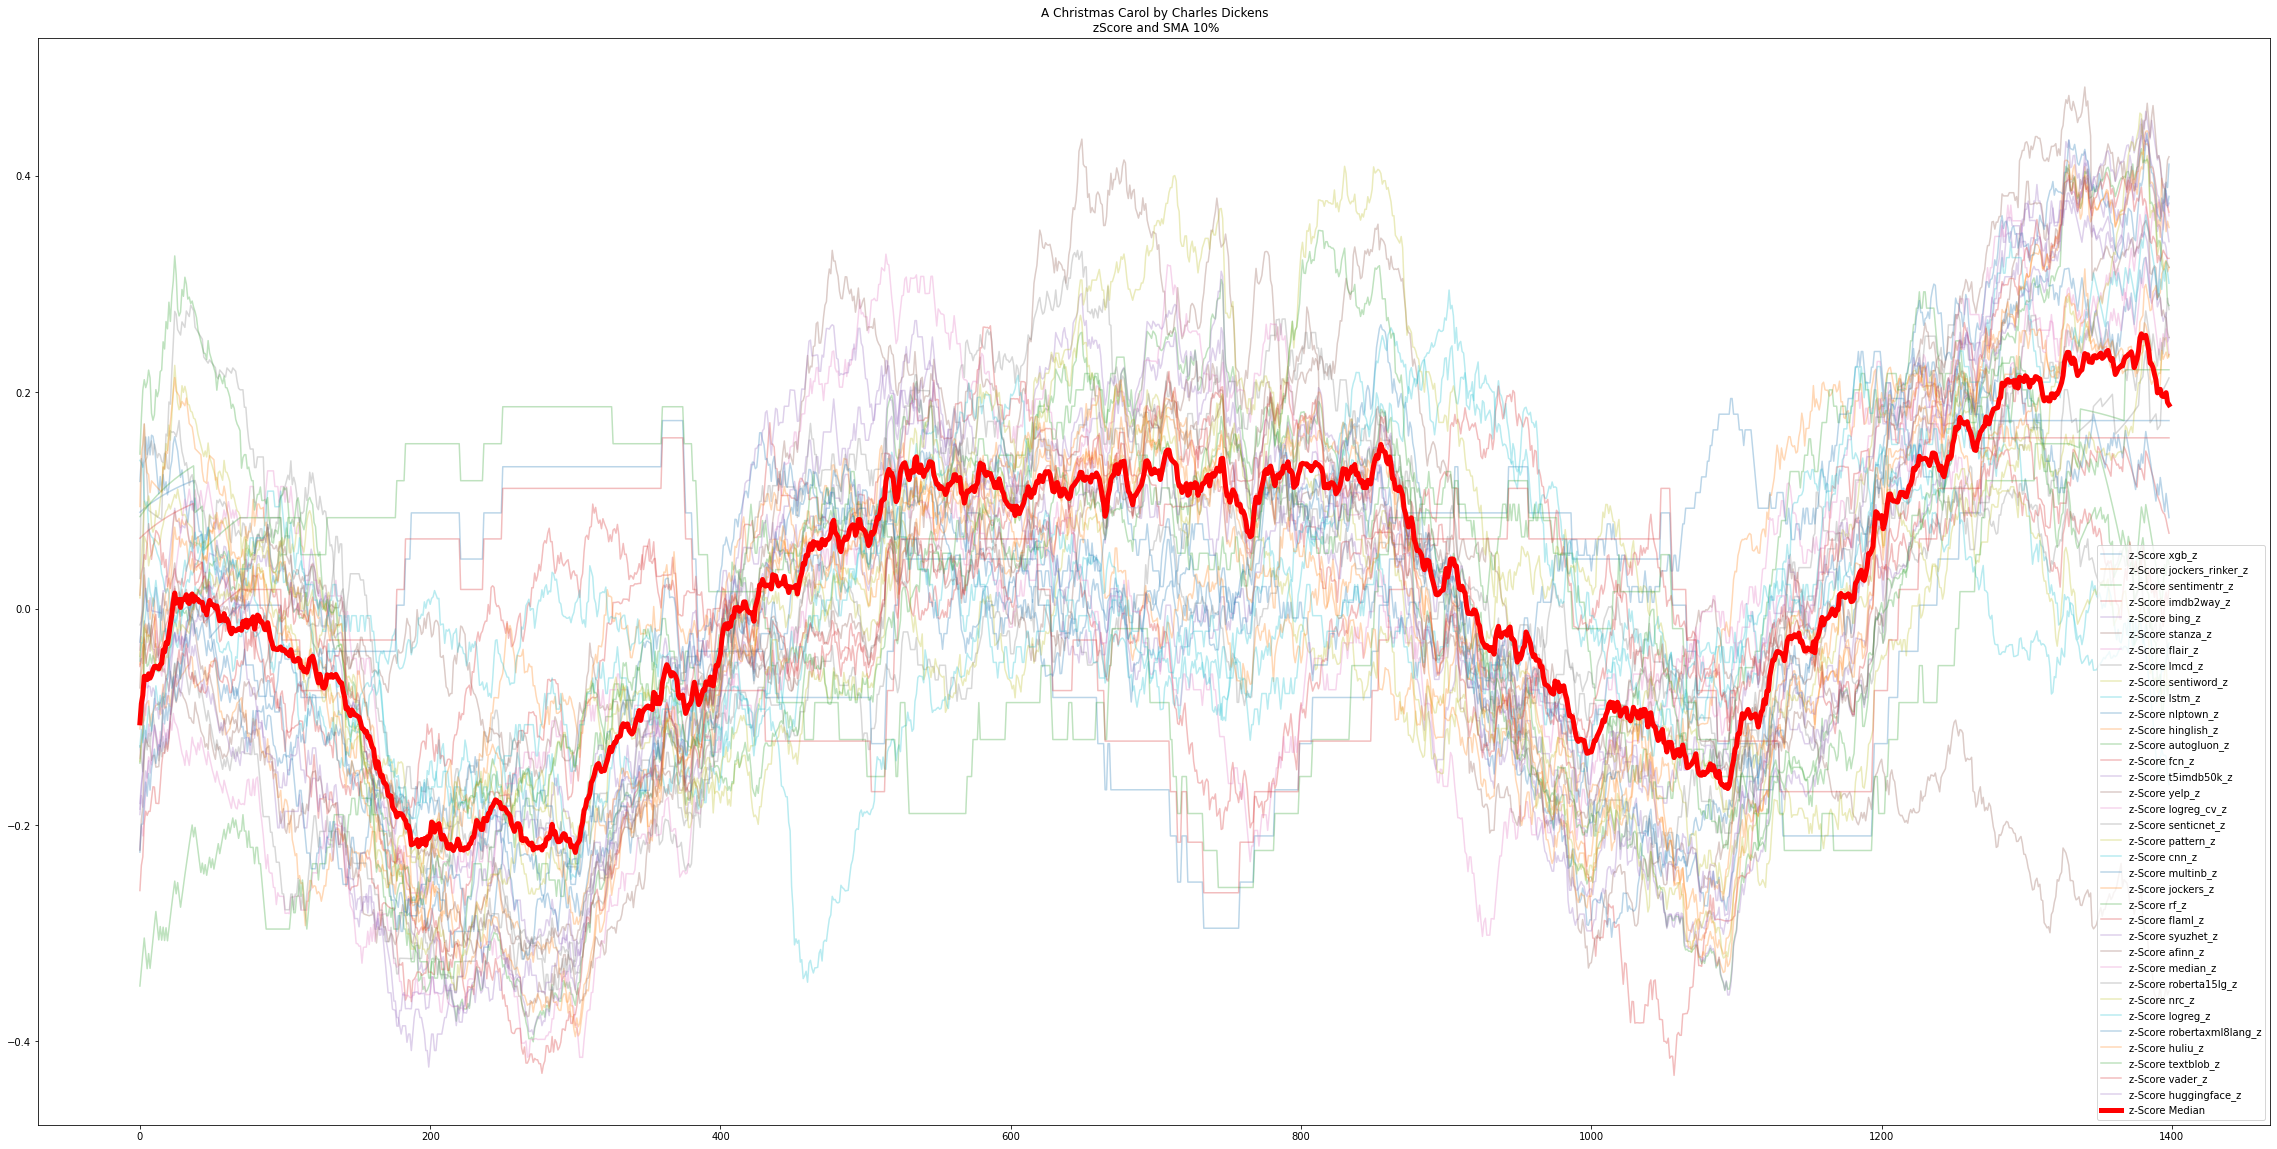

Processing Corpus: cdickens_greatexpectations...
Corpus #1 cdickens_greatexpectations with Model #0 xgb_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #1 jockers_rinker_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #2 sentimentr_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #3 imdb2way_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #4 bing_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #5 stanza_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #6 flair_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #7 lmcd_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #8 sentiword_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #9 lstm_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #10 nlptown_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #11 hinglish_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #12 autogluon_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #13 fcn_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #14 t5imdb50k_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #15 yelp_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #16 logreg_cv_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #17 senticnet_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #18 pattern_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #19 cnn_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #20 multinb_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #21 jockers_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #22 rf_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #23 flaml_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #24 syuzhet_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #25 afinn_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #26 median_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #27 roberta15lg_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #28 nrc_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #29 logreg_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #30 robertaxml8lang_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #31 huliu_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #32 textblob_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #33 vader_z: has 74 columns but only 69 model columns


Corpus #1 cdickens_greatexpectations with Model #34 huggingface_z: has 74 columns but only 69 model columns


Text(0.5, 1.0, 'Great Expectations by Charles Dickens\n zScore and SMA 10%')

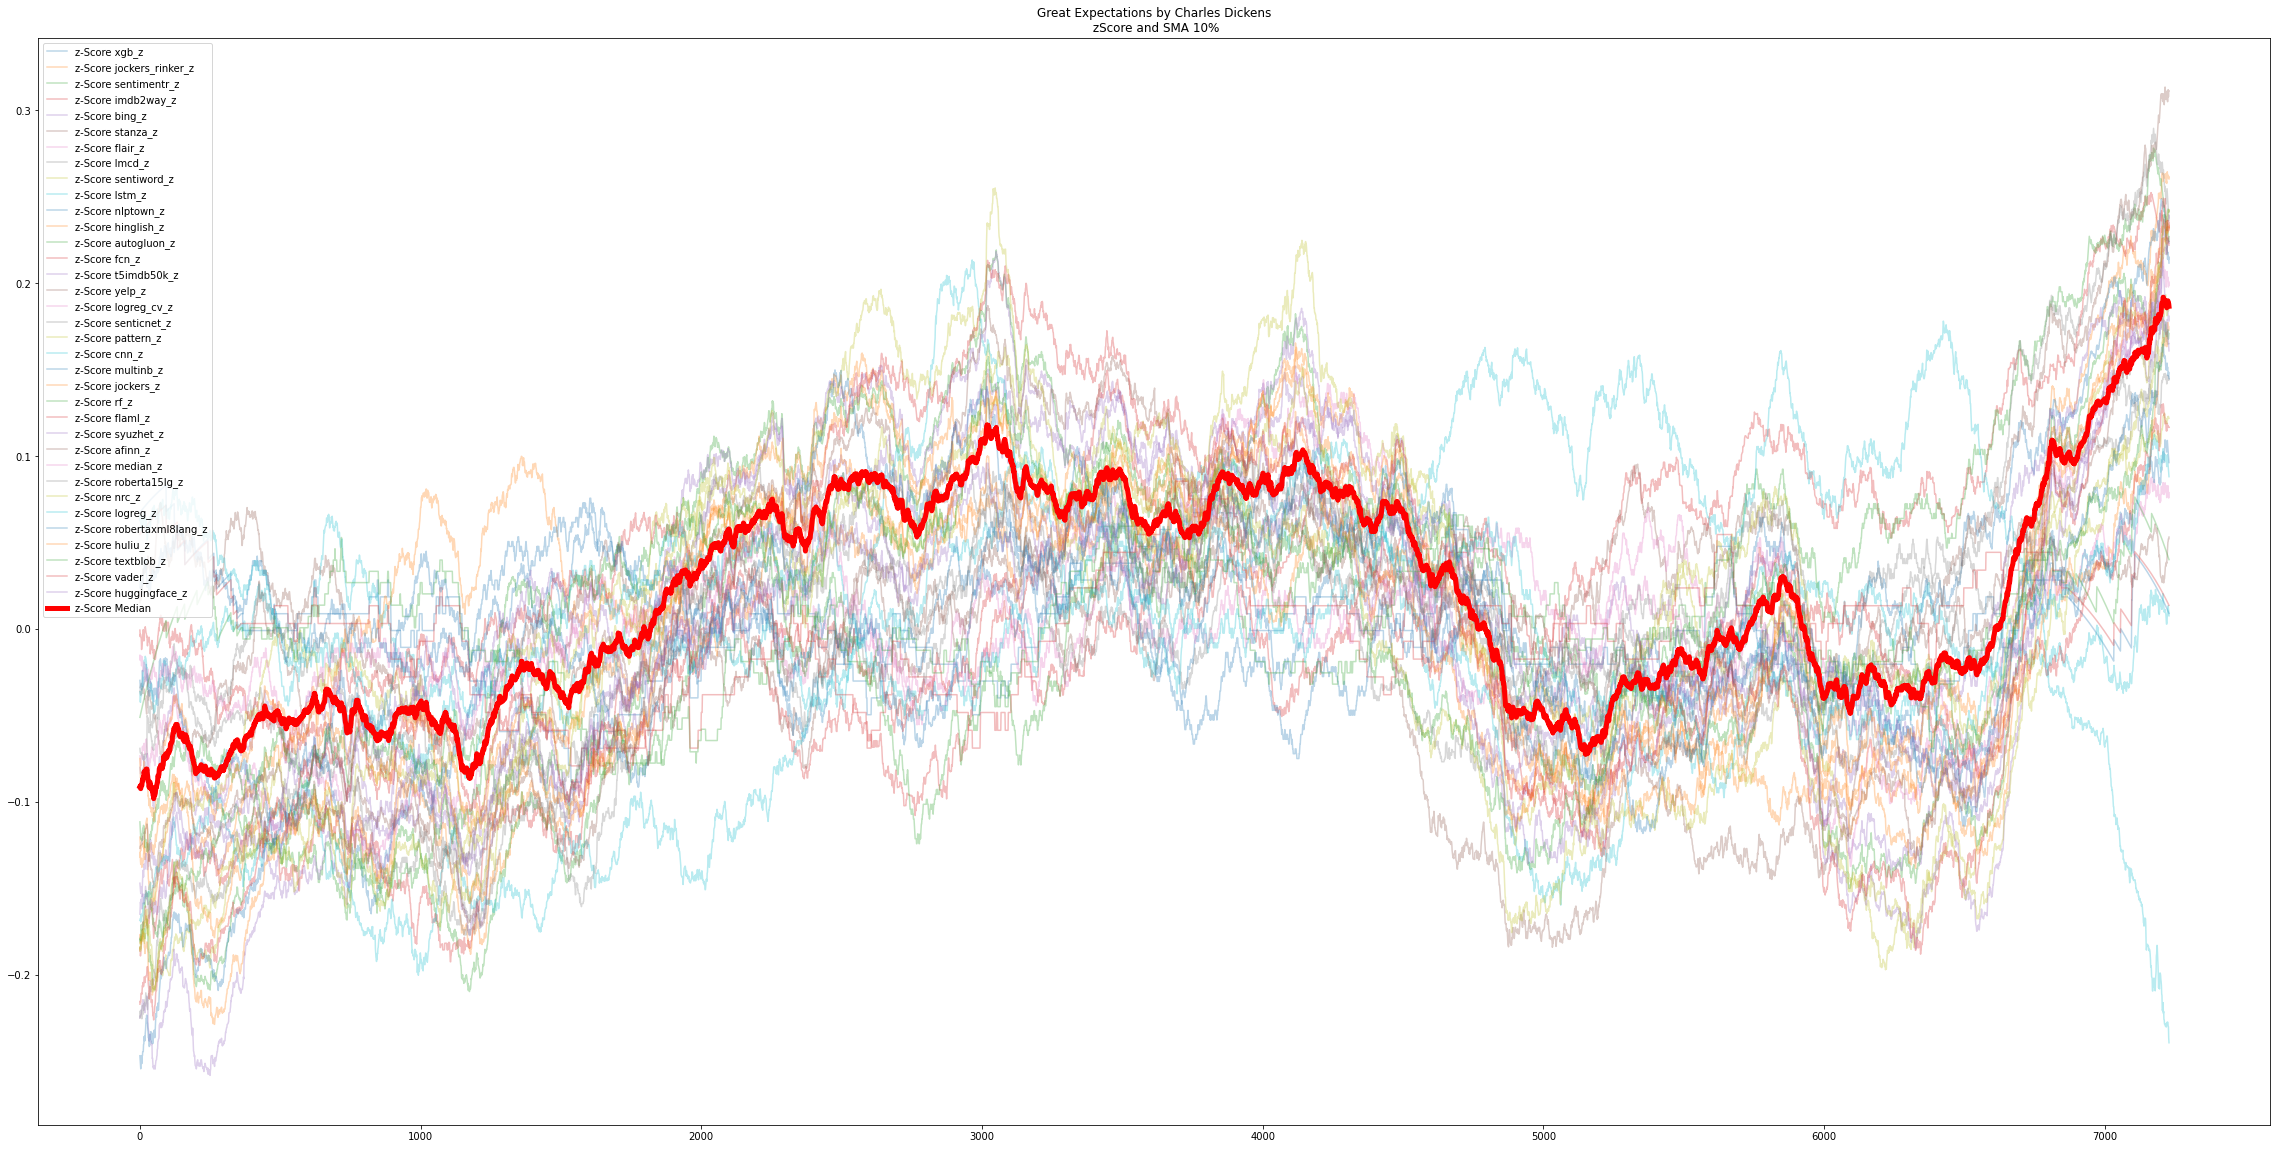

In [112]:
# Plot zScore + SMA 10% for all Models in each Corpus (including bold median_z)


plt.rcParams["figure.figsize"] = (40,20)

save_plot = False

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls[:2]): # [:2]):
  print(f'Processing Corpus: {acorpus}...')
  win10per = int(0.1*corpora_all_dt[acorpus]['median_z'].shape[0])

  for j, amodel_z in enumerate(model_z_cols_ls): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    # amodel_z = f'{amodel}_z'
    corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().plot(label=f'z-Score {amodel_z}', alpha=0.3) # , style=['r*-'], linewidth=2.0)

  corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=5.0)

  plt.title(f'{corpora_full_dt[acorpus]}\n zScore and SMA 10%')    
  plt.legend(loc='best')
  # corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=3.0)

  if save_plot:
    filename_plt = f'./{subdir_name}/plt_sma10_{amodel_z}.png'
    plt.savefig(filename_plt)

  plt.show();


## **Skip to [Save zScore] below**

In [ ]:
# Create list of all <model>_z DataFrames

pattern_z = re.compile(r'_z$')
pattern_zz = re.compile(r'_z_z$')
models_z_dt = {}
models_z_ls = []

for i, acorpus in enumerate(corpora_ls): # [:2]):
  print(f'Processing Corpus: {acorpus}')

  acorpus_model_ls = corpora_allz_dt[acorpus].columns
  for j, amodel in enumerate(acorpus_model_ls):

    # win10per = int(0.10*corpora_all_dt[acorpus].shape[0])

    if pattern_z.search(amodel) and not pattern_zz.search(amodel):
      models_z_ls.append(amodel)

  models_z_dt[acorpus] = copy.deepcopy(models_z_ls) # .copy(deep=True)
  models_z_ls = []

  print(f'models_z_dt[acorpus]: {models_z_dt[acorpus]}\n\n')


In [ ]:
models_z_dt['cdickens_achristmascarol']

In [ ]:
plt.rcParams["figure.figsize"] = (40,20)

subdir_name = 'data_corpora_plots'
pattern_z = re.compile(r'_z$')

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls): # [:2]):
  print(acorpus)

  models_z_ls = models_z_dt[acorpus]
  win10per = int(0.1*corpora_allz_dt[acorpus]['median_z'].shape[0])

  corpora_allz_dt[acorpus][models_z_ls].rolling(win10per, center=True).mean().plot(label=amodel_z, alpha=0.3)

  # if i == (len(corpora_ls)):
  #   corpora_all_dt[amodel]['median_z'].rolling(win10per, center=True).mean().plot(alpha=0.6, color='black', width=2)
  #   plt.title(f'{acorpus} Simple Moving Average')
  #  plt.legend(loc='best')
  
  # atitle = f'{acorpus}\n z-Score SMA 10%'
  # ax.title(atitle)
  plt.title(f'{acorpus}\n z-Score SMA 10%')    
  plt.legend(loc='best')
  
  # corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

  filename_plt = f'./{subdir_name}/plt_zsma10_{amodel}.png'
  plt.savefig(filename_plt)

  fig.show()
  # plt.show();  

In [ ]:

plt.rcParams["figure.figsize"] = (40,20)

subdir_name = 'data_corpora_plots'
pattern_z = re.compile(r'_z$')

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls): # [:2]):
  print(acorpus)
  # fig,ax = plt.subplots()

  for j, amodel in enumerate(model_cols_ls):

    # win10per = int(0.1*corpora_all_dt[acorpus]['median_z'].shape[0])

    # if j == 0:
    #   corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

    # print(f'Corpus #{i} {acorpus} with Model #{j} {amodel}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')
    win10per = int(0.10*corpora_all_dt[acorpus].shape[0])

    # Skip existing z-Scores
    if pattern_z.search(amodel):    

      # amodel_z = f'{amodel}_z'

      # corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True).mean().plot(label=amodel_z, alpha=0.3)

      # corpora_all_dt[acorpus][amodel].astype(np.float64)
      # temp_df[amodel] = corpora_all_dt[acorpus][amodel].value.rolling(win10per, min_periods=1,center=True).apply(zscore)
      
      # temp_df[amodel] = pd.Series(type(stdscaler.fit_transform(np.asarray(corpora_all_dt[acorpus][amodel]).reshape(-1,1)))) # .reshape(-1,1))
      # print(f'temp_df[amodel]: {temp_df[amodel]}')
      # print(f'len(temp_df[amodel]: {len(temp_df[amodel])}')

      # corpora_all_dt[acorpus][amodel_z].rolling(win10per, min_periods=1,center=True).mean().plot() # .mean().plot(label=amodel)

      # ax.plot(corpora_all_dt[acorpus][amodel_z].index, corpora_all_dt[acorpus][amodel_z].rolling(win10per, min_periods=1,center=True).mean(), label=amodel_z)
      # ax.set_xlabel('Sentence No.')
      # ax.set_ylabel('Sentiment (z-Score')
      # ax.legend(loc='best')

      # plt.title(f'{acorpus}\n z-Score SMA 10%')
      # plt.legend(loc='best') 
      pass

    corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True).mean().plot(label=amodel_z, alpha=0.3)

  # if i == (len(corpora_ls)):
  #   corpora_all_dt[amodel]['median_z'].rolling(win10per, center=True).mean().plot(alpha=0.6, color='black', width=2)
  #   plt.title(f'{acorpus} Simple Moving Average')
  #  plt.legend(loc='best')
  
  atitle = f'{acorpus}\n z-Score SMA 10%'
  ax.title(atitle)
  # plt.title(f'{acorpus}\n z-Score SMA 10%')    
  # plt.legend(loc='best')
  
  # corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

  filename_plt = f'./{subdir_name}/plt_sma10_{amodel}.png'
  plt.savefig(filename_plt)

  fig.show()
  # plt.show();

## **Temp Patch Dataset Errors**

In [ ]:
corpora_all_dt['tmorrison_beloved'].head()

In [ ]:
%whos dict

In [ ]:
corpora_sa_dt.keys()

In [ ]:
# TODO: Fix error (all 0) for tmorrison_beloved/pattern model (leads to NaN in zScore/SMA/LTTB)

corpora_sa_dt['baseline_tmorrison_beloved']['pattern'].value_counts()

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern'].value_counts

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern'].rolling(400, center=True, min_periods=1).mean().plot()

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern_z'].value_counts()

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern_z'].rolling(400, center=True, min_periods=1).mean().plot()

## **Save zScore/SMA 10% DataFrames**

In [ ]:
# Save all models with orignal and zscore values

subdir_out = 'data_corpora_all'

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  filename_out = f'models_all_{acorpus}.csv'
  fullpath_out = f'./{subdir_out}/{filename_out}'

  print(f'\nSaving Corpus: {acorpus}...')
  corpora_all_dt[acorpus].to_csv(fullpath_out)

# **Total Model Coherence per Corpus**

For each Corpus, compute a Coherence Metric for all Models by:
* Computing the Euclidian Distance of each zScore/SMA Model from the zScore/SMA Median
* Sum all Euclidian Distances 
* Identify and record furtherest outliers per Corpus/Model
* Sum all Euclidian Distances after removing 2-3 of ~35 outliers (5-10% discard)
* Normalize 2 Sums of Euclidian Distances over the entire set of Corpora
* Rank order the Corpora in terms of Coherence
* Rank Order Models in terms of Outlier frequency

In [27]:
%whos list

Variable                Type    Data/Info
-----------------------------------------
corpora_ls              list    n=25
groups_ls               list    n=4
model_cols_ls           list    n=69
model_noncols_ls        list    n=5
model_z_cols_ls         list    n=35
models_baseline_ls      list    n=12
models_dnn_ls           list    n=3
models_ml_ls            list    n=7
models_sentimentr_ls    list    n=7
models_supervised_ls    list    n=5
models_syuzhetr_ls      list    n=4
models_transformer_ls   list    n=8


In [26]:
corpora_all_dt['cdickens_achristmascarol'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1398
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sent_no            1399 non-null   int64  
 1   fcn                1399 non-null   float64
 2   lstm               1399 non-null   float64
 3   cnn                1399 non-null   float64
 4   multinb            1399 non-null   float64
 5   logreg             1399 non-null   float64
 6   logreg_cv          1399 non-null   float64
 7   rf                 1399 non-null   float64
 8   xgb                1399 non-null   float64
 9   flaml              1399 non-null   float64
 10  autogluon          1399 non-null   float64
 11  parag_no           1399 non-null   int64  
 12  sect_no            1399 non-null   int64  
 13  sent_raw           1399 non-null   object 
 14  sent_clean         1399 non-null   object 
 15  sentimentr         1399 non-null   float64
 16  syuzhet            1399 

In [29]:
model_z_cols_ls

['xgb_z',
 'jockers_rinker_z',
 'sentimentr_z',
 'imdb2way_z',
 'bing_z',
 'stanza_z',
 'flair_z',
 'lmcd_z',
 'sentiword_z',
 'lstm_z',
 'nlptown_z',
 'hinglish_z',
 'autogluon_z',
 'fcn_z',
 't5imdb50k_z',
 'yelp_z',
 'logreg_cv_z',
 'senticnet_z',
 'pattern_z',
 'cnn_z',
 'multinb_z',
 'jockers_z',
 'rf_z',
 'flaml_z',
 'syuzhet_z',
 'afinn_z',
 'median_z',
 'roberta15lg_z',
 'nrc_z',
 'logreg_z',
 'robertaxml8lang_z',
 'huliu_z',
 'textblob_z',
 'vader_z',
 'huggingface_z']

In [36]:
np.sum(np.abs(corpora_all_dt['cdickens_achristmascarol']['vader_z'] - corpora_all_dt['cdickens_achristmascarol']['median_z']))

746.8553783525214

In [63]:
import copy

In [119]:
# Save all models with orignal and zscore values

subdir_out = 'data_corpora_all'

median_model_area_ls = []
corpora_median_area_dt = {}

for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus #{i}: {acorpus}')

  median_model_area_ls = []

  for j, amodel_z in enumerate(model_z_cols_ls):
    print(f'  with Model #{j}: {amodel_z}')

    median_model_area = np.sum(np.abs(corpora_all_dt[acorpus][amodel_z] - corpora_all_dt[acorpus]['median_z']))
    print(f'    Area between Median: {median_model_area}')

    median_model_area_ls.append((amodel_z, median_model_area))
    # print(f'      Growing list: {median_model_area_ls}')

  median_model_area_sorted_ls = copy.deepcopy(median_model_area_ls) # .sort(key=lambda x:x[1]) #  # .sort(key=lambda x: float(x[1])) # .sort(key=lambda y: y[1]) # .sort(key=lambda y: y[1])
  # median_model_area_sorted_ls.sort(key=lambda x:x[1], reverse=True)
  # print(f'        Copying sorted list: {median_model_area_sorted_ls}')

  corpora_median_area_dt[acorpus] = median_model_area_sorted_ls

  # corpora_all_dt[acorpus][model_z_cols_ls].head(2)

  # TODO: Check for NaN and Impute

  # corpora_all_dt[acorpus]['all_z_std'] = corpora_all_dt[acorpus][model_z_cols_ls].std(axis=1)

  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  # filename_out = f'models_all_{acorpus}.csv'
  # fullpath_out = f'./{subdir_out}/{filename_out}'

  # print(f'\nSaving Corpus: {acorpus}...')
  # corpora_all_dt[acorpus].to_csv(fullpath_out)

Processing Corpus #0: cdickens_achristmascarol
  with Model #0: xgb_z
    Area between Median: 801.1141539982372
  with Model #1: jockers_rinker_z
    Area between Median: 662.1585812903049
  with Model #2: sentimentr_z
    Area between Median: 603.6227233040942
  with Model #3: imdb2way_z
    Area between Median: 1055.3678847631636
  with Model #4: bing_z
    Area between Median: 676.326293632346
  with Model #5: stanza_z
    Area between Median: 1104.6165035098688
  with Model #6: flair_z
    Area between Median: 997.8428336469817
  with Model #7: lmcd_z
    Area between Median: 796.6963528671961
  with Model #8: sentiword_z
    Area between Median: 873.1549253628932
  with Model #9: lstm_z
    Area between Median: 1035.7754182670783
  with Model #10: nlptown_z
    Area between Median: 1014.7360808548264
  with Model #11: hinglish_z
    Area between Median: 927.8539635495246
  with Model #12: autogluon_z
    Area between Median: 1107.2385713612402
  with Model #13: fcn_z
    Area bet

In [122]:
# Create DataFrame from Dictionaries

corpora_median_area_dt = {}
temp_df = pd.DataFrame()
first_loop_fl = True

for acorpus, area_tup_ls in corpora_median_area_dt.items():
  
  print(f'\nCorpus: {acorpus}\n   {area_tup_ls[:3]}')

  areas_ls = [i[1] for i in area_tup_ls]
  model_ls = [i[0] for i in area_tup_ls]
  temp_df = pd.DataFrame(area_tup_ls, columns=['model_z', 'area_z'] )
  if first_loop_fl:
    corpora_median_area_dt[acorpus] = temp_df.copy(deep=True)
    first_loop_fl = False
  else:
    corpora_median_area_dt = pd.merge(corpora_median_area_dt, temp_df, how='inner', on = 'model_z')

# corpora_median_area_df = pd.DataFrame(corpora_median_area_dt, columns=['model_z', 'area_z'])


"""
for acorpus, area_tup_ls in corpora_median_area_dt.items():
  
  print(f'Corpus: {acorpus}\n   {area_tup_ls}')




for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus #{i}: {acorpus}')

  median_model_area_ls = []

  for j, amodel_z in enumerate(model_z_cols_ls):
    print(f'  with Model #{j}: {amodel_z}')

    median_model_area = np.sum(np.abs(corpora_all_dt[acorpus][amodel_z] - corpora_all_dt[acorpus]['median_z']))
    print(f'    Area between Median: {median_model_area}')

    median_model_area_ls.append((amodel_z, median_model_area))


corpora_median_area_dt['cdickens_achristmascarol'].plot(kind=bar)
""";

In [124]:
corpora_median_area_dt.keys()

dict_keys([])

In [123]:
corpora_median_area_dt['cdickens_achristmascarol']

KeyError: ignored

In [118]:
corpora_median_area_df.head()

,model_z,area_z


In [102]:
print(corpora_median_area_dt['cdickens_achristmascarol'][0][1])

588.3427378282074


In [103]:
print(corpora_median_area_dt['cdickens_achristmascarol'].sort(key=lambda x:x[0][1]))

None


In [56]:
print(corpora_median_area_dt['cdickens_achristmascarol']) #.sort(key=lambda y: y[1]))

[('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('pattern_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('median_z', 0.0), ('afinn_z', 588.3427378282074), ('syuzhet_z', 592.330204972936), ('sentimentr_z', 603.6227233040942), ('jockers_z', 653.9093839574673), ('syuzhet_z', 655.7197854355743), ('sentimentr_z', 661.4436782497694), ('jockers_rinker_z', 662.1585812903049), ('bing_z', 676.326293632346), ('huliu_z', 686.9806760253634), ('flaml_z', 741.0558272106668), ('vader_z', 746.8553783525214), ('jockers_z', 747.6862072463248), ('nrc_z', 751.7647947918726), ('jockers_rinker_z', 752.9100731347121), ('xgb_z', 765.21020388328

In [55]:
mx = max(corpora_median_area_dt['cdickens_achristmascarol'], key=lambda e: int(e[1]))
print(mx)

('multinb_z', 10955.383057930585)


# **Downsample with LTTB**

## **Option (a): Read in SMA 10%/LTTB DataFrames**

In [ ]:
# Save all Corpora with both old and new LTTB reduced Models

corpora_all25_dt = {}

subdir_all = 'data_corpora_all'

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls):


  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  filename_out = f'models_all25_{acorpus}.csv'
  fullpath_out = f'./{subdir_all}/{filename_out}'
  print(f'Reading Corpus: {acorpus} from file: {fullpath_out}')

  corpora_all25_dt[acorpus] = pd.read_csv(fullpath_out, index_col=[0])

NameError: ignored

In [ ]:
%whos list 

In [ ]:
plt.rcParams["figure.figsize"] = (40,20)

lttb_pts = 25

for i, acorpus in enumerate(corpora_ls[:1]):

  corpora_all25_dt[acorpus].plot()
  plt.title(f'{corpora_full_dt[acorpus]}\n zScore/SMA 10% Downsampled to {lttb_pts} Points with LTTB', fontdict = {'fontsize' : 16})
  plt.legend(loc='best') 

## **Option (b): Generate SMA 10%/LTTB DataFrames**

In [ ]:
!pip install lttb

In [ ]:
import lttb

In [ ]:
acorpus = 'cdickens_achristmascarol'

print(f'Corpus: {acorpus} has {corpora_all_dt[acorpus].shape[0]} time values')

win10per = int(0.1*corpora_all_dt[acorpus].shape[0])
corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

In [ ]:
acorpus = 'cdickens_achristmascarol'
model_z = 'nrc_z'

type(corpora_all_dt[acorpus][model_z].values)

In [ ]:
# Downsample to n_pts points:

n_pts = 50

x_np = corpora_all_dt[acorpus]['median_z'].shape[0]

# Generate an example data set of 100 random points:
#  - column 0 represents time values (strictly increasing)
#  - column 1 represents the metric of interest: CPU usage, stock price, etc.

y_np = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().values
data = np.array([range(x_np), y_np]).T # np.random.random(100)]).T

# Downsample it to 20 points:
small_data = lttb.downsample(data, n_out=n_pts)
assert small_data.shape == (n_pts, 2)

# temp_np = corpora_all_dt[acorpus]['median_z'].values.reshape(1,-1) # ).ravel()
# print(f'Shape temp_np: {temp_np.shape}')
# small_data = lttb.downsample(temp_np, n_out=20)
# assert small_data.shape == (20, 2)

plt.plot(small_data.T[0],small_data.T[1])
plt.show()



In [ ]:
n_pts = 25

x_np = corpora_all_dt[acorpus]['median_z'].shape[0]

# Generate an example data set of 100 random points:
#  - column 0 represents time values (strictly increasing)
#  - column 1 represents the metric of interest: CPU usage, stock price, etc.

y_np = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().values
data = np.array([range(x_np), y_np]).T # np.random.random(100)]).
# Downsample it to 20 points:
small_data = lttb.downsample(data, n_out=n_pts)
assert small_data.shape == (n_pts, 2)
print(f'type small_data: {type(small_data)}')
print(f'small_data.shape: {small_data.shape}')

# temp_np = corpora_all_dt[acorpus]['median_z'].values.reshape(1,-1) # ).ravel()
# print(f'Shape temp_np: {temp_np.shape}')
# small_data = lttb.downsample(temp_np, n_out=20)
# assert small_data.shape == (20, 2)

plt.plot(small_data.T[0],small_data.T[1])

plt.show()

## **Plot zScore/SMA 10% with Downsampling via LTTB**

In [ ]:
# Anomaly: tmorrison_beloved/pattern is all 0s

corpora_all_dt['tmorrison_beloved'].head()

In [ ]:
# For Corpora 'tmorrison_beloved' both 'pattern' and thus 'pattern_z' are 0 and NaN respectively
#   for now, just fillna both with '0' as place holders for this one model (pattern) to view all other Models

corpora_all_dt['tmorrison_beloved']['pattern_z'] = corpora_all_dt['tmorrison_beloved']['pattern_z'].fillna(0)

# corpora_all_dt['tmorrison_beloved']['pattern_z'] = corpora_all_dt['tmorrison_beloved']['syuzhet_z']

In [ ]:
# Verify corpora_all_dt['tomorrison-beloved']['pattern_z'] are all (NaN -> 0)

corpora_all_dt['tmorrison_beloved'].head()

In [ ]:
# Check if any NaN in tmorrison_beloved
# corpora_all_dt[corpora_all_dt['tmorrison_beloved'].isnull().any(axis=1)]

corpora_all_dt['tmorrison_beloved'].isnull().any(axis=1).any()

In [ ]:
model_all_cols_ls = corpora_all_dt['cdickens_achristmascarol'].columns
print(model_all_cols_ls)

print(f'\nEach Corpus has {len(model_all_cols_ls)} Columns')

# Get list of non-Model Columns in Corpus DataFrame
model_noncols_ls = ['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean']
print(f'\n  {len(model_noncols_ls)} Columns are meta-information (not Models) [model_noncols_ls]:  \n  {model_noncols_ls}')

# Get list of Model Columns in Corpus DataFrame
model_cols_ls = list(set(model_all_cols_ls) - set(model_noncols_ls))
print(f'\n  {len(model_cols_ls)} Columns are these Models [model_cols_ls]:\n  {[i for i in model_cols_ls]}')

# Get list of zScore Model Columns in Corpus DataFrame
model_z_cols_ls = [i for i in model_cols_ls if i.endswith('_z')]
print(f'\n  {len(model_z_cols_ls)} Columns are zScore Models [model_z_cols_ls]:\n  {model_z_cols_ls}')

In [ ]:
corpora_ls

In [ ]:
# Workaround to deal with break at NaN in tmorrison_beloved/pattern_z 
#   change NaN->0 and continue execution for the rest of these Corpora

corpora_temp_ls = [
                    'tmorrison_beloved',
                    'vnabokov_palefire',
                    'vwoolf_mrsdalloway',
                    'vwoolf_orlando',
                    'vwoolf_thewaves',
                    'vwoolf_tothelighthouse'
                    ]

In [ ]:
model_z_cols_ls

In [ ]:
# Downsample all z-Score Model Series to n_pts with LTTB Algo

lttb_pts = 25

save_plot = False

subdir_name = 'data_corpora_plots'

corpora_all25_dt = {}

for acorpus in corpora_ls:
  corpora_all25_dt[acorpus] = pd.DataFrame()

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls): # corpora_ls): # corpora_temp_ls): # [:2]):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  for j, amodel_z in enumerate(model_z_cols_ls):
    # if j == 0:
    #   corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    amodel_z_nlttb = f'{amodel_z}_{lttb_pts}lttb'

    x_np = corpora_all_dt[acorpus][amodel_z].index # shape[0]
    y_np = corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().values
    # data = np.array([range(x_np), y_np]).T
    data = np.array([x_np, y_np]).T

    # Downsample it to lttb_pts points:
    small_data = lttb.downsample(data, n_out=lttb_pts)
    assert small_data.shape == (lttb_pts, 2)

    temp_ser = pd.Series()
    temp_ser = pd.Series(small_data.T[1].tolist()) # small_data.T[0], small_data.T[1])
    corpora_all25_dt[acorpus][amodel_z_nlttb] = temp_ser.copy(deep=True) # = pd.Series(small_data.T[1].tolist()) # small_data.T[0], small_data.T[1])

    # temp_np = corpora_all_dt[acorpus]['vader_z'].values.reshape(1,-1) # ).ravel()
    # print(f'Shape temp_np: {temp_np.shape}')
    # small_data = lttb.downsample(temp_np, n_out=20)
    # assert small_data.shape == (20, 2)

    plt.plot(small_data.T[0],small_data.T[1], label=amodel_z)

  plt.title(f'{corpora_full_dt[acorpus]}\n zScore/SMA 10% Downsampled to {lttb_pts} Points with LTTB')

  plt.legend(loc='best') 
  filename_plt = f'./{subdir_name}/plt_lttb{lttb_pts}_{amodel}.png'
  if save_plot:
    plt.savefig(filename_plt)
  plt.show()




In [ ]:
# import copy

# corpora_all25_dt = copy.deepcopy(corpora_all50_dt)

In [ ]:
corpora_all25_dt.keys()

In [ ]:
# Verify the LTTB Dim-Red corpora dimensions

corpora_all25_dt['cdickens_achristmascarol'].shape

In [ ]:
corpora_all25_dt['cdickens_achristmascarol'].head()

In [ ]:
# Verify the LTTB Dim-Red corpora dimensions

corpora_all25_dt['vnabokov_palefire'].shape

In [ ]:
corpora_all25_dt['vnabokov_palefire'].head()

## **Skip to [Save zScore/SMA/LTTB DataFrames**

In [ ]:
# If only a few missing, could've interpolated missing values from surrounding non-NaN values

# corpora_all_dt[corpora_all_dt['tmorrison_beloved'].interpolate(method='linear', limit_direction='both')

In [ ]:
corpora_all_dt['cdickens_achristmascarol'].columns

In [ ]:
# Downsample all z-Score Model Series to n_pts with LTTB Algo

lttb_pts = 50

subdir_name = 'data_corpora_plots'

corpora_all50_dt = {}

for acorpus in corpora_ls:
  corpora_all50_dt[acorpus] = pd.DataFrame()

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls): # [:2]):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  for j, amodel in enumerate(model_cols_ls):
    if j == 0:
      corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    amodel_z = f'{amodel}_z'

    x_np = corpora_all_dt[acorpus][amodel_z].shape[0]
    y_np = corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().values
    data = np.array([range(x_np), y_np]).T

    # Downsample it to lttb_pts points:
    small_data = lttb.downsample(data, n_out=lttb_pts)
    assert small_data.shape == (lttb_pts, 2)

    corpora_all50_dt[acorpus][amodel] = pd.Series(small_data.tolist()) # small_data.T[0], small_data.T[1])

    # temp_np = corpora_all_dt[acorpus]['vader_z'].values.reshape(1,-1) # ).ravel()
    # print(f'Shape temp_np: {temp_np.shape}')
    # small_data = lttb.downsample(temp_np, n_out=20)
    # assert small_data.shape == (20, 2)

    plt.plot(small_data.T[0],small_data.T[1], label=amodel)

  plt.title(f'{acorpus}\n SMA 10% Followed by LTTB Downsampled to {lttb_pts} Points')
  plt.legend(loc='best') 
  filename_plt = f'./{subdir_name}/plt_lttb{lttb_pts}_{amodel}.png'
  plt.savefig(filename_plt)
  plt.show()




In [ ]:
corpora_all50_dt['cdickens_achristmascarol']['vader'][:5]
type(corpora_all50_dt['cdickens_achristmascarol']['vader'][0])

In [ ]:
# Save all models with orignal and zscore values

subdir_out = 'data_corpora_all'

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  filename_out = f'models_all50_{acorpus}.csv'
  fullpath_out = f'./{subdir_out}/{filename_out}'

  print(f'\nSaving Corpus: {acorpus}...')
  corpora_all50_dt[acorpus].to_csv(fullpath_out)

## **Save zScore/SMA/LTTB DataFrames**

In [ ]:
# Save all Corpora with both old and new LTTB reduced Models

subdir_out = 'data_corpora_all'

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  filename_out = f'models_all25_{acorpus}.csv'
  fullpath_out = f'./{subdir_out}/{filename_out}'

  print(f'\nSaving Corpus: {acorpus}...')
  corpora_all25_dt[acorpus].to_csv(fullpath_out)

# **[DEFUNCT] LOWESS Smoothing**

In [ ]:
# from statsmodels.nonparametric.smoothers_lowess import lowess

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [ ]:
# Downsample all z-Score Model Series to n_pts with LTTB Algo

from statsmodels.nonparametric.smoothers_lowess import lowess

afrac = 0.1 

def make_lowess(series, frac=0.1):
    endog = series.values
    exog = series.index.values

    smooth = lowess(endog, exog, frac)
    index, data = np.transpose(smooth)

    return pd.Series(data, index=pd.to_datetime(index)) 

for acorpus in corpora_ls:
  corpora_all50_dt[acorpus] = pd.DataFrame()

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls[:2]):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  for j, amodel in enumerate(model_cols_ls):
    if j == 0:
      corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    amodel_lowess = f"{amodel}_lowess{''.join(str(afrac).split('.'))}"
    print(f'amodel_lowess: {amodel_lowess}')

    temp_np = make_lowess(corpora_all_dt[acorpus][amodel], frac=afrac)
    # plt.plot(temp_np[0], temp_np[1], label=amodel)

    corpora_all_dt[acorpus][amodel_lowess] = pd.Series(temp_np.tolist()) # small_data.T[0], small_data.T[1])



    # temp_np = corpora_all_dt[acorpus]['vader_z'].values.reshape(1,-1) # ).ravel()
    # print(f'Shape temp_np: {temp_np.shape}')
    # small_data = lttb.downsample(temp_np, n_out=20)
    # assert small_data.shape == (20, 2)

    # plt.plot(small_data.T[0],small_data.T[1], label=amodel)

  plt.title(f'{acorpus} LTTB Downsampled SMA 10%')
  plt.legend(loc='best') 
  plt.show();

In [ ]:
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
y = np.sin(x) + np.random.normal(size=len(x))

z = lowess(y, x)
w = lowess(y, x, frac=1./3)

# plt.plot(w)

from statsmodels.nonparametric.smoothers_lowess import lowess

def make_lowess(series, frac=0.1):
    endog = series.values
    exog = series.index.values

    smooth = lowess(endog, exog, frac)
    index, data = np.transpose(smooth)

    return pd.Series(data, index=pd.to_datetime(index)) 

temp_df = pd.DataFrame()
temp_df['test'] = make_lowess(corpora_all_dt['cdickens_achristmascarol']['vader_z'], frac=0.1)

temp_df['test'].plot()

In [ ]:
temp_df.shape

In [ ]:
# Downsample all z-Score Model Series to n_pts with LTTB Algo

n_pts = 100

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls[:2]):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  for j, amodel in enumerate(model_cols_ls):
    if j == 0:
      corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    amodel_z = f'{amodel}_z'
    
    x_np = corpora_all_dt[acorpus][amodel_z].shape[0]
    y_np = corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().values
    data = np.array([range(x_np), y_np]).T

    # Downsample it to n_pts points:
    small_data = lttb.downsample(data, n_out=n_pts)
    assert small_data.shape == (n_pts, 2)

    # temp_np = corpora_all_dt[acorpus]['vader_z'].values.reshape(1,-1) # ).ravel()
    # print(f'Shape temp_np: {temp_np.shape}')
    # small_data = lttb.downsample(temp_np, n_out=20)
    # assert small_data.shape == (20, 2)

    plt.plot(small_data.T[0],small_data.T[1], label=amodel)

  plt.title(f'{acorpus} LTTB Downsampled SMA 10%')
  plt.legend(loc='best') 
  plt.show()


"""
    win10per = int(0.10*corpora_all_dt[acorpus].shape[0])

    temp_np = np.asarray(corpora_all_dt[acorpus][amodel])
    temp_z_np = zscore(temp_np)

    # temp_std_ser = stdscaler.fit_transform(np.asarray(temp_ser).reshape(1,-1)).ravel()
    # pd.Series(temp_std_ser)
    amodel_z = f'{amodel}_z'
    corpora_all_dt[acorpus][amodel_z] = pd.Series(temp_z_np)
    corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True).mean().plot(label=amodel_z, alpha=0.3)

    # corpora_all_dt[acorpus][amodel].astype(np.float64)
    # temp_df[amodel] = corpora_all_dt[acorpus][amodel].value.rolling(win10per, min_periods=1,center=True).apply(zscore)
    
    # temp_df[amodel] = pd.Series(type(stdscaler.fit_transform(np.asarray(corpora_all_dt[acorpus][amodel]).reshape(-1,1)))) # .reshape(-1,1))
    # print(f'temp_df[amodel]: {temp_df[amodel]}')
    # print(f'len(temp_df[amodel]: {len(temp_df[amodel])}')
    # temp_df[amodel].rolling(win10per, min_periods=1,center=True).mean().plot() # .mean().plot(label=amodel)

    # plt.title(f'{acorpus} Simple Moving Average')
    # plt.legend(loc='best') 

  # if i == (len(corpora_ls)):
  #   corpora_all_dt[amodel]['median_z'].rolling(win10per, center=True).mean().plot(alpha=0.6, color='black', width=2)
  #   plt.title(f'{acorpus} Simple Moving Average')
  #  plt.legend(loc='best')
  plt.title(f'{acorpus} Simple Moving Average')    
  plt.legend(loc='best')
  corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)
  plt.show();
""";

# **DTW Hierarchical Clustering**

* https://github.com/wannesm/dtaidistance

* https://dtaidistance.readthedocs.io/en/latest/usage/clustering.html

* DTW w/Hierachical Clustering https://github.com/wannesm/dtaidistance

* HITL/Interactive Clustering (DTAIDistance+COBRAS) https://github.com/ML-KULeuven/cobras 

* https://github.com/markdregan/K-Nearest-Neighbors-with-Dynamic-Time-Warping

* https://github.com/timeseriesAI/tsai

* https://github.com/tslearn-team/tslearn

* https://stats.stackexchange.com/questions/131281/dynamic-time-warping-clustering

* https://stats.stackexchange.com/questions/109343/dynamic-time-warping-for-irregular-time-series

In [ ]:
corpora_all25_dt.keys()

In [ ]:
corpora_all25_dt['cdickens_achristmascarol'].columns

In [ ]:
!pip install dtaidistance

In [ ]:
from dtaidistance import dtw
from dtaidistance import clustering
from dtaidistance import dtw_visualisation as dtwvis

In [ ]:
models_all25_ls = corpora_all25_dt['cdickens_achristmascarol'].columns.tolist()
type(models_all25_ls)
models_all25_ls

In [ ]:
list(corpora_all25_dt.keys())

In [ ]:
ds = dtw.distance_matrix_fast(aseries)
type(ds)

In [ ]:
# DTW Hierarchical Clustering for every Model per each Corpus

# Flag to indicate save plot to file
save_plots = False

# Create list of 1D vectorized distance matricies (one for each Corpus with Model distances)
corpora_all25v_dt = {}

# Get lists of LTTB Dimensionality-Reduced Corpora/Models
corpora_all25_ls = list(corpora_all25_dt.keys())

for i, acorpus in enumerate(corpora_all25_ls): # [:2]):
  # print(f'Processing Corpus: {acorpus}')

  models_all25_ls = corpora_all25_dt[acorpus].columns.tolist()

  models_all25_ls = [i if i != 'logreg_cv_z_25lttb' else 'logreg-cv_z_25lttb' for i in models_all25_ls]
  models_all25_ls = [i if i != 'jockers_rinker_z_25lttb' else 'jockers-rinker_z_25lttb' for i in models_all25_ls]

  models_all25_ls = [i.split('_')[0] for i in models_all25_ls]

  print(f'Corpus #{i} {acorpus} has {len(corpora_all25_dt[acorpus].columns)} model columns')

  aseries = corpora_all25_dt[acorpus].to_numpy().T

  ds = dtw.distance_matrix_fast(aseries) #  block=((1, 4), (3, 5)))

  # Convert upper triangular part of this Distance Matrix (not incl diag) into 1D vector
  ds_1d = ds[np.triu_indices(ds.shape[0], k = 1)] # offset
  corpora_all25v_dt[acorpus] = ds_1d

  # Custom Hierarchical clustering
  model1 = clustering.Hierarchical(dtw.distance_matrix, {})
  cluster_idx = model1.fit(aseries)
  # Augment Hierarchical object to keep track of the full tree
  model2 = clustering.HierarchicalTree(model1, tr_left_margin=0) # , tr_label_margin=-10)
  cluster_idx = model2.fit(aseries)

  # SciPy linkage clustering
  model3 = clustering.LinkageTree(dtw.distance_matrix, {})
  cluster_idx = model3.fit(aseries)

  # Plot Agglomerative Hierarchical Tree and Save as file
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40,40))
  # show_ts_label = lambda idx: "ts-" + str(idx)
  show_ts_label = lambda idx: models_all25_ls[idx]
  fig.tight_layout()
  fig.subplots_adjust(top=0.95)
  corpus_title = f'{acorpus}'
  fig.suptitle(corpus_title)
  acorpus = f'{acorpus}'
  filename_path = f'./data_corpora_plots/plot_dtw25_{acorpus}.png'
  if save_plots:
    # Save Plot to File
    model2.plot(filename_path, axes=ax, show_ts_label=show_ts_label, # True, # lttb_cols_ls,
              show_tr_label=True, ts_label_margin=0,
              ts_left_margin=0, tr_label_margin=0.1) #  ts_sample_length=1)
    # Display Plot File
    Image(filename_path)
    plt.show()
    plt.close()
  else:
    # Just Display Plots (no save to file)
    model2.plot(axes=ax, show_ts_label=show_ts_label, # True, # lttb_cols_ls,
              show_tr_label=True, ts_label_margin=0,
              ts_left_margin=0, tr_label_margin=0.1) #  ts_sample_length=1)
    plt.show()    
    plt.close()

# **Model Stability in Hierarchical Tree**

Per Corpus and across all Corpora, compute a Stability Metric per Model and Model Type:

* Model Type Stability: Lexicon, AutoML, DNN, BERT by Weighted Clustering Formula
* Individual Model Stability: by %variability of every other model by degree of closeness

# **Cluster Distance Matrices**

* https://machinelearningmastery.com/clustering-algorithms-with-python/

* https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html 

* https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/

## **Option (a) Read Universal Matrix of Distance Matricies**

In [ ]:
# DOES NOT WORK

# Read Universal Matrix of all Vectorized Distance Matricies (one per Corpus)

subdir_name = 'data_corpora_all'

filename_data = f'models_all_dist_matrix.csv'
fullpath_name = f'./{subdir_name}/{filename_data}'

dist_vecs_df = pd.read_csv(fullpath_name)

print(f'\n\n  Read Universal Matrix with shape: {dist_vecs_df.shape}')

## **Option (b): Generate Universal Matrix of Distance Matricies**

In [ ]:
# Vectorized 1D Distance Matrices saved in corpora_all25v_dt

corpora_all25v_dt.keys()

In [ ]:
corpora_all25v_dt['cdickens_achristmascarol']

In [ ]:
# Convert Dictionary of Vectors into Numpy Array

dist_vecs_obj = corpora_all25v_dt.values()
models_obj = corpora_all25v_dt.items()

# Convert object to a list
data_ls = list(dist_vecs_obj)
model_ls = list(models_obj)

# Convert list to an array
dist_np = np.array(data_ls)
  
# print the numpy array
print(dist_np)


In [ ]:
dist_vecs_df = pd.DataFrame(corpora_all25v_dt)
dist_vecs_df.head()

## **Save Universal Matrix of all Vectorized Distance Matricies (one per Corpus)**

In [ ]:
# # Save Vectorized Distance Matricies

subdir_out = 'data_corpora_all'

filename_out = f'models_all_dist_matrix.csv'
fullpath_out = f'./{subdir_out}/{filename_out}'

print(f'\nSaving Single Matrix containing a row of 1D Vectorized Distance Matricies for each of the {dist_vecs_df.shape[1]} Corpus (distance between Models)')
dist_vecs_df.to_csv(fullpath_out)

print(f'\n\n  Matrix shape: {dist_vecs_df.shape}')

## **Heatmap of Universal Matrix of Vectorized Distance Matricies (one per Corpus)**

In [ ]:
import seaborn as sns; sns.set(color_codes=True)

In [ ]:
dist_vecs_T_df = pd.DataFrame()
dist_vecs_T_df = dist_vecs_df.T # pivot(columns=[i for i in range(35)])
dist_vecs_T_df.head()

In [ ]:
dist_vecs_T_df.shape

In [ ]:
%%time

# Hint:

# Cluster 
# https://colab.research.google.com/github/saskeli/data-analysis-with-python-summer-2019/blob/master/clustering.ipynb#scrollTo=8u0WPsxaYUkZ


# iris = sns.load_dataset("iris")
# species = iris.pop("species")   # Remove the species column
# print(species.unique())         # The samples seems to be from these three species

# plt.rcParams["figure.figsize"] = (40,40)
# sns.set(rc={'figure.figsize':(20, 20)})
# plt.figure(figsize=(40,40))
# fig, ax = plt.subplots()
# fig.set_size_inches(20, 20)

sns.set(font_scale=1.8)
# g = sns.clustermap(dist_vecs_T_df, method="ward", col_cluster=False, cbar_kws={'label': 'distance'}, figsize=(30,30)); # Cluster only the rows
# g = sns.clustermap(dist_vecs_T_df, method="ward", col_cluster=False, cbar_kws={'label': 'distance'}, z_score=0, cmap="vlag", figsize=(30,30)); # Cluster only the rows
g = sns.clustermap(dist_vecs_T_df, method="ward", col_cluster=False, cbar_kws={'label': 'distance'}, standard_scale=1, cmap="vlag", figsize=(30,30)); # Cluster only the rows
g.fig.suptitle('Distance Between Corpora based upon Sentiment Model Distances') 
#plt.colorbar().ax.set_title('This is a title')
#plt.gca().images[-1].colorbar.ax.set_title("title")

subdir_out = 'data_corpora_plots'

filename_out = f'models_all_dist_matrix.png'
fullpath_out = f'./{subdir_out}/{filename_out}'

plt.savefig(fullpath_out)

In [ ]:
# https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

In [ ]:
# read dataset
df = pd.read_csv('data/cereal.csv')
# get correlations
df_corr = df.corr()
# irrelevant fields
fields = ['rating', 'shelf', 'cups', 'weight']
# drop rows
df_corr.drop(fields, inplace=True)
# drop cols
df_corr.drop(fields, axis=1, inplace=True)

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

In [ ]:
# Scatter and kde Density Plot

fig, ax = plt.subplots(1, figsize=(12,8))
sb.kdeplot(df.potass, df.fiber, cmap='Blues',
           shade=True, shade_lowest=False, clip=(-1,300))
plt.scatter(df.potass, df.fiber, color='orangered')

In [ ]:
# https://towardsdatascience.com/reordering-pandas-dataframe-columns-thumbs-down-on-standard-solutions-1ff0bc2941d5

def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])
  
# Test

df = movecol(df, 
             cols_to_move=['Score','Grade'], 
             ref_col='Room',
             place='After')
df

In [ ]:
# DBSCAN Clustering

# https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [ ]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dist_vecs_df)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
#  Reducing the dimensionality of the data to make it visualizable

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

In [ ]:
# Numpy array of all the cluster labels assigned to each data point

db_default = DBSCAN(eps = 0.0375, min_samples = 2).fit(X_principal)
labels = db_default.labels_

In [ ]:
labels

In [ ]:
np.min(labels)

In [ ]:
np.max(labels)

In [ ]:
np.unique(labels)

In [ ]:
4%3

In [ ]:
# Building the label to colour mapping

# https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/ 

colours = {}

label_max = np.max(labels)
for i in range(label_max+1):
  i_scaled = (i/label_max)
  colours[i] = (i_scaled, i_scaled, i_scaled)


# colours[0] = 'r'
# colours[1] = 'g'
# colours[2] = 'b'
colours[-1] = 'k'
# colours[3] = 'k'

# Building the colour vector for each data point
cvec = [colours[label%4] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html 

print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
iris.head()

In [ ]:
plt.rcParams["figure.figsize"] = (40,40)

In [ ]:
# Cluster 
# https://colab.research.google.com/github/saskeli/data-analysis-with-python-summer-2019/blob/master/clustering.ipynb#scrollTo=8u0WPsxaYUkZ


iris = sns.load_dataset("iris")
species = iris.pop("species")   # Remove the species column
print(species.unique())         # The samples seems to be from these three species
sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'}); # Cluster only the rows
#plt.colorbar().ax.set_title('This is a title')
#plt.gca().images[-1].colorbar.ax.set_title("title")


In [ ]:
# Dimensionality Reduction and Visualization

# **END OF NOTEBOOK**

In [ ]:
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)

dtwvis.plot_warping(s1, s2, path, filename="warp.png")

In [ ]:
from IPython.display import Image

In [ ]:
Image('warp.png')

In [ ]:
corpora_all25_dt.keys()

In [ ]:
lttb_cols_ls = corpora_all25_dt['cdickens_achristmascarol'].columns.to_list()
# lttb_cols_ls.sort()


lttb_cols_ls = [i if i != 'logreg_cv_z_25lttb' else 'logreg-cv_z_25lttb' for i in lttb_cols_ls]
lttb_cols_ls = [i if i != 'jockers_rinker_z_25lttb' else 'jockers-rinker_z_25lttb' for i in lttb_cols_ls]

lttb_cols_ls = [i.split('_')[0] for i in lttb_cols_ls]
print(lttb_cols_ls)
len(lttb_cols_ls)

# [unicode(x.strip()) if x is not None else '' for x in row]

In [ ]:
corpora_all25_dt['cdickens_achristmascarol'].head()

In [ ]:
series = corpora_all25_dt['cdickens_achristmascarol'].to_numpy().T
series

In [ ]:
series.shape

In [ ]:
%%time

# NOTE:

ds = dtw.distance_matrix_fast(series) #  block=((1, 4), (3, 5)))

# OR

# ds = dtw.distance_matrix(series) # , block=((1, 4), (3, 5)))

In [ ]:
ds = dtw.distance_matrix(series) # , compact=True) # , block=((1, 4), (3, 5)))

In [ ]:
ds

In [ ]:
ds.shape

In [ ]:
35*35

In [ ]:
X = np.array([[1,2,3],[4,5,6],[7,8,9]])
#array([[1, 2, 3],
#       [4, 5, 6],
#       [7, 8, 9]])

#get the upper triangular part of this matrix
v = X[np.triu_indices(X.shape[0], k = 1)] # offset
print(v)
# [2 3 6]

In [ ]:
ds_1d = ds[np.triu_indices(ds.shape[0], k=1)]
len(ds_1d)

In [ ]:
import seaborn as sns; sns.set()

In [ ]:
ax = sns.heatmap(ds, annot=True, fmt="d")

plt.title("How to visualize (plot) \n a numpy array in python using seaborn ?",fontsize=12)

plt.savefig("visualize_numpy_array_01.png", bbox_inches='tight', dpi=100)

plt.show()

In [ ]:
%%time

# NOTE:

# Custom Hierarchical clustering
model1 = clustering.Hierarchical(dtw.distance_matrix, {})
cluster_idx = model1.fit(series)

# Augment Hierarchical object to keep track of the full tree
model2 = clustering.HierarchicalTree(model1, tr_left_margin=0) # , tr_label_margin=-10)
cluster_idx = model2.fit(series)

# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix, {})
cluster_idx = model3.fit(series)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40, 40)

In [ ]:
%%time

# NOTE:

# model2.plot(ts_label_margin=0, show_ts_label=lttb_cols_ls, show_tr_label=True);

In [ ]:
plt.rcParams.update({'font.size': 20})

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40,40))
# show_ts_label = lambda idx: "ts-" + str(idx)
show_ts_label = lambda idx: lttb_cols_ls[idx]
fig.tight_layout()
fig.subplots_adjust(top=0.95)
corpus_title = 'A Christmas Carol by Charles Dickens'
fig.suptitle(corpus_title)
acorpus = f'cdickens_achristmascarol'
filename_path = f'./data_corpora_plots/plot_dtw25_{acorpus}.png'
model2.plot(filename_path, axes=ax, show_ts_label=show_ts_label, # True, # lttb_cols_ls,
           show_tr_label=True, ts_label_margin=0,
           ts_left_margin=0, tr_label_margin=0.1) #  ts_sample_length=1)

Image(filename_plot)

In [ ]:
!pwd

In [ ]:
model2.plot("myplot.png", show_ts_label=True, show_tr_label=True)

In [ ]:
Image('myplot.png')

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40,40))
# show_ts_label = lambda idx: "ts-" + str(idx)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('A Christmas Carol by Charles Dickens')
# fig.title('A Christmas Carol by Charles Dickens')
model3.plot(axes=ax, show_ts_label=lttb_cols_ls,
           show_tr_label=True, ts_label_margin=0,
           ts_left_margin=0, tr_label_margin=0.1) #  ts_sample_length=1)

# **END OF NOTEBOOK**

# **Get Corpora**

In [ ]:
corpora_ls[0]

In [ ]:
!pwd

In [ ]:
corpus_name = corpora_ls[0]

!ls -altr $corpus_name

In [ ]:
temp_df = pd.read_csv(f'./{corpus_name}/corpus_text_sents_clean_{corpus_name}.csv')
temp_df.rename(columns={'Unnamed: 0':'sent_no'}, inplace=True)
temp_df['sent_clean'] = temp_df['sent_clean'].astype('string')
temp_df.head()

In [ ]:
temp_df = f'./{corpora_ls[0]}/'

In [ ]:
!pwd

In [ ]:
# Get a Dictionary of clean text for every item in the corpora (listed in corpora_ls)

corpora_dt = {}
for i, acorpus in enumerate(corpora_ls):
  print(f'\nREADING #{i}: {acorpus}\n========================================\n')
  # os.listdir(adir)
  corpus_csv = f'./{acorpus}/corpus_text_sents_clean_{acorpus}.csv'
  print(f'{os.getcwd()}\n     {corpus_csv}')
  temp_df = pd.DataFrame()
  temp_df = pd.read_csv(corpus_csv, encoding='ISO-8859–1')
  temp_df.rename(columns={'Unnamed: 0':'sent_no'}, inplace=True)
  temp_df['sent_clean'] = temp_df['sent_clean'].astype('string')
  corpora_dt[acorpus] = temp_df

In [ ]:
corpora_dt['cdickens_achristmascarol'].head()

In [ ]:
len(corpora_dt.keys())

In [ ]:
[f'{corpus_name}' for corpus_name in corpora_dt.keys()]

In [ ]:
corpora_dt['cdickens_achristmascarol'].head()

In [ ]:
corpora_dt['cdickens_achristmascarol'].info()

In [ ]:
corpora_dt['cdickens_achristmascarol'].shape